In [40]:
import pandas as pd

file_path = '/Users/xinqiaoyang/Desktop/Data Literacy/project/flying-etiquette.csv'


try:
    df = pd.read_csv(file_path, sep=';')
    print("Shape of the DataFrame:", df.shape)
except Exception as e:
    print("Error reading file:", e)



Shape of the DataFrame: (1040, 27)


In [41]:
# Counting the number of questions in the dataset
# We'll exclude the first column (RespondentID) as it is not a question
num_questions = len(df.columns) - 1

# To find out the number of different types of answers for each question,
# we'll look at the unique values in each column (excluding RespondentID)
# 21 self-report questions plus 5 demographic variable questions
answer_types = {column: df[column].nunique() for column in df.columns if column != 'RespondentID'}
num_questions, answer_types


(26,
 {'How often do you travel by plane?': 6,
  'Do you ever recline your seat when you fly?': 5,
  'How tall are you?': 20,
  'Do you have any children under 18?': 2,
  'In a row of three seats, who should get to use the two arm rests?': 5,
  'In a row of two seats, who should get to use the middle arm rest?': 5,
  'Who should have control over the window shade?': 2,
  'Is itrude to move to an unsold seat on a plane?': 3,
  'Generally speaking, is it rude to say more than a few words tothe stranger sitting next to you on a plane?': 3,
  "On a 6 hour flight from NYC to LA, how many times is it acceptable to get up if you're not in an aisle seat?": 6,
  'Under normal circumstances, does a person who reclines their seat during a flight have any obligation to the person sitting behind them?': 2,
  'Is itrude to recline your seat on a plane?': 3,
  'Given the opportunity, would you eliminate the possibility of reclining seats on planes entirely?': 2,
  'Is it rude to ask someone to switch

In [42]:
# Calculating the number of rows that have at least one 'NaN' value, how to deal with it? big problem, 33% data lost.
num_rows_with_na = df.isna().any(axis=1).sum()
num_rows_with_na

353

In [43]:
# To print out all different types of answers for each question, we'll iterate over each column
# and use the unique() function to get the unique values in each column (excluding RespondentID)

answer_types_detailed = {column: df[column].unique() for column in df.columns if column != 'RespondentID'}

# Displaying the answer types for each question
for question, answers in answer_types_detailed.items():
    print(f"{question}: {answers}\n")

# Note: This will display the unique answers for each question in the dataset.


How often do you travel by plane?: ['Once a year or less' 'Once a month or less' 'Never'
 'A few times per week' 'Every day' 'A few times per month']

Do you ever recline your seat when you fly?: [nan 'About half the time' 'Usually' 'Always' 'Once in a while' 'Never']

How tall are you?: [nan '6\'3"' '5\'8"' '5\'11"' '5\'7"' '5\'9"' '6\'2"' '6\'0"' '5\'6"'
 '6\'1"' '5\'10"' '5\'5"' '6\'4"' '6\'6" and above' 'Under 5 ft.' '6\'5"'
 '5\'4"' '5\'0"' '5\'3"' '5\'1"' '5\'2"']

Do you have any children under 18?: [nan 'Yes' 'No']

In a row of three seats, who should get to use the two arm rests?: [nan 'The arm rests should be shared'
 'Whoever puts their arm on the arm rest first'
 'The person in the middle seat gets both arm rests'
 'Other (please specify)'
 'The people in the aisle and window seats get both arm rests']

In a row of two seats, who should get to use the middle arm rest?: [nan 'The arm rests should be shared' 'The person in aisle'
 'Whoever puts their arm on the arm rest first

# Coding the responses--binary/ordinal/muti-nomial

In [44]:
# To most of the questions which has "Y/N" answer, "Yes" represents more polite, and "No" represents less polite. 
# Higher number of coding means more polite/has more etiqutte.
# Excpet "LOCATION" and "TWO ARM RESTS" ,"MIDDLE ARM RESTS" question and demograpgic variables(coding follows muti-nomial way) and
# Reverse coding for:
#"Do you ever recline your seat when you fly",
#"On a 6 hour flight from NYC to LA, how many times is it acceptable to get up if you're not in an aisle seat".

#"Do you have children under 18" should also be a demographic variable.


######### NOTE: Interpretation of the any specific question/hypothesis should refer to the coding way of related variable, "does it make sense?"/"does it counter intuition?"

In [45]:
# Coding the responses according to the new specified rules

# Function to apply the coding rules
def code_responses(row):
    # Binary type coding for Yes/No questions
    binary_map = {'Yes': 1, 'No': 0}
    binary_questions = ['Do you have any children under 18?',
                        'Have you ever used personal electronics during take off or landing in violation of a flight attendant\'s direction?',
                        'Have you ever smoked a cigarette in an airplane bathroom when it was against the rules?',
                       'Given the opportunity, would you eliminate the possibility of reclining seats on planes entirely?']
    for col in binary_questions:
        if row[col] in binary_map:
            row[col] = binary_map[row[col]]

    # Gender coding
    gender_map = {'Male': 0, 'Female': 1}
    if row['Gender'] in gender_map:
        row['Gender'] = gender_map[row['Gender']]

    # Age coding
    age_map = {'18-29': 0, '30-44': 1, '45-60': 2, '> 60': 3}
    if row['Age'] in age_map:
        row['Age'] = age_map[row['Age']]

    # Household Income coding
    income_map = {'$0 - $24,999': 0, '$25,000 - $49,999': 1, '$50,000 - $99,999': 2, '$100,000 - $149,999': 3, '150000': 4}
    if row['Household Income'] in income_map:
        row['Household Income'] = income_map[row['Household Income']]

    # Education coding
    education_map = {'Less than high school degree': 0, 'High school degree': 1, 'Some college or Associate degree': 2, 
                     'Bachelor degree': 3, 'Graduate degree': 4}
    if row['Education'] in education_map:
        row['Education'] = education_map[row['Education']]

    # Location coding #does not really have impact like levels.
    location_map = {'Pacific': 0, 'East North Central': 1, 'New England': 2, 'Mountain': 3, 'South Atlantic': 4, 
                    'East South Central': 5, 'Middle Atlantic': 6, 'West North Central': 7, 'West South Central': 8}
    if row['Location (Census Region)'] in location_map:
        row['Location (Census Region)'] = location_map[row['Location (Census Region)']]

    return row

# Applying the coding rules to the dataframe
coded_df = df.apply(code_responses, axis=1)
coded_df.head()  # Displaying the first few rows of the coded dataframe for inspection


RespondentID How often do you travel by plane?  \
0    3436139758               Once a year or less   
1    3434278696               Once a year or less   
2    3434275578               Once a year or less   
3    3434268208               Once a year or less   
4    3434250245              Once a month or less   

  Do you ever recline your seat when you fly? How tall are you?  \
0                                         NaN               NaN   
1                         About half the time              6'3"   
2                                     Usually              5'8"   
3                                      Always             5'11"   
4                         About half the time              5'7"   

   Do you have any children under 18?  \
0                                 NaN   
1                                 1.0   
2                                 0.0   
3                                 0.0   
4                                 0.0   

  In a row of three seats, who should get to use the two arm rests?  \
0                                                NaN                  
1                     The arm rests should be shared                  
2       Whoever puts their arm on the arm rest first                  
3                     The arm rests should be shared                  
4  The person in the middle seat gets both arm rests                  

  In a row of two seats, who should get to use the middle arm rest?  \
0                                                NaN                  
1                     The arm rests should be shared                  
2                     The arm rests should be shared                  
3                     The arm rests should be shared                  
4                                The person in aisle                  

      Who should have control over the window shade?  \
0                                                NaN   
1           Everyone in the row should have some say   
2  The person in the window seat should have excl...   
3           Everyone in the row should have some say   
4           Everyone in the row should have some say   

  Is itrude to move to an unsold seat on a plane?  \
0                                             NaN   
1                             No, not rude at all   
2                             No, not rude at all   
3                             No, not rude at all   
4                             No, not rude at all   

  Generally speaking, is it rude to say more than a few words tothe stranger sitting next to you on a plane?  \
0                                                NaN                                                           
1                                No, not at all rude                                                           
2                                No, not at all rude                                                           
3                                No, not at all rude                                                           
4                                No, not at all rude                                                           

   ... Is itrude to wake a passenger up if you are trying to walk around?  \
0  ...                                                NaN                   
1  ...                                No, not at all rude                   
2  ...                                 Yes, somewhat rude                   
3  ...                                 Yes, somewhat rude                   
4  ...                                 Yes, somewhat rude                   

  In general, is itrude to bring a baby on a plane?  \
0                                               NaN   
1                               No, not at all rude   
2                                Yes, somewhat rude   
3                                Yes, somewhat rude   
4                                Yes, somewhat rude   

  In general, is it rude to knowingly bring unruly childr

In [46]:
# Reapplying the additional rules (9 to 11) to the dataset which already has the initial 7 rules applied

# Specific question coding for "On a 6 hour flight from NYC to LA..."
times_map = {
    'More than five times times': 0,
    'Four times': 1,
    'Three times': 2,
    'Twice': 3,
    'Once': 4,
    'It is not okay to get up during a flight': 5
}
flight_question = 'On a 6 hour flight from NYC to LA, how many times is it acceptable to get up if you\'re not in an aisle seat?'
coded_df[flight_question] = coded_df[flight_question].map(times_map)

# Coding for "Who should have control over the window shade?"
shade_control_map = {
    'The person in the window seat should have exclusive control': 0,
    'Everyone in the row should have some say': 1
}
shade_question = 'Who should have control over the window shade?'
coded_df[shade_question] = coded_df[shade_question].map(shade_control_map)

# Coding for recline obligation question
recline_obligation_map = {
    'Yes, they should not recline their chair if the person behind them asks them not to': 1,
    'No, the person on the flight has no obligation to the person behind them': 0
}
recline_question = 'Under normal circumstances, does a person who reclines their seat during a flight have any obligation to the person sitting behind them?'
coded_df[recline_question] = coded_df[recline_question].map(recline_obligation_map)

coded_df.head()  # Displaying the first few rows of the fully coded dataframe for inspection


RespondentID How often do you travel by plane?  \
0    3436139758               Once a year or less   
1    3434278696               Once a year or less   
2    3434275578               Once a year or less   
3    3434268208               Once a year or less   
4    3434250245              Once a month or less   

  Do you ever recline your seat when you fly? How tall are you?  \
0                                         NaN               NaN   
1                         About half the time              6'3"   
2                                     Usually              5'8"   
3                                      Always             5'11"   
4                         About half the time              5'7"   

   Do you have any children under 18?  \
0                                 NaN   
1                                 1.0   
2                                 0.0   
3                                 0.0   
4                                 0.0   

  In a row of three seats, who should get to use the two arm rests?  \
0                                                NaN                  
1                     The arm rests should be shared                  
2       Whoever puts their arm on the arm rest first                  
3                     The arm rests should be shared                  
4  The person in the middle seat gets both arm rests                  

  In a row of two seats, who should get to use the middle arm rest?  \
0                                                NaN                  
1                     The arm rests should be shared                  
2                     The arm rests should be shared                  
3                     The arm rests should be shared                  
4                                The person in aisle                  

   Who should have control over the window shade?  \
0                                             NaN   
1                                             1.0   
2                                             0.0   
3                                             1.0   
4                                             1.0   

  Is itrude to move to an unsold seat on a plane?  \
0                                             NaN   
1                             No, not rude at all   
2                             No, not rude at all   
3                             No, not rude at all   
4                             No, not rude at all   

  Generally speaking, is it rude to say more than a few words tothe stranger sitting next to you on a plane?  \
0                                                NaN                                                           
1                                No, not at all rude                                                           
2                                No, not at all rude                                                           
3                                No, not at all rude                                                           
4                                No, not at all rude                                                           

   ...  Is itrude to wake a passenger up if you are trying to walk around?  \
0  ...                                                NaN                    
1  ...                                No, not at all rude                    
2  ...                                 Yes, somewhat rude                    
3  ...                                 Yes, somewhat rude                    
4  ...                                 Yes, somewhat rude                    

   In general, is itrude to bring a baby on a plane?  \
0                                                NaN   
1                                No, not at all rude   
2                                 Yes, somewhat rude   
3                                 Yes, somewhat rude   
4                                 Yes, somewhat rude   

  In general, is it rude to knowingly bring unruly children on 

In [47]:
# Coding the responses for the question "How often do you travel by plane?" according to the specified rule

travel_frequency_map = {
    'Every day': 5,
    'A few times per week': 4,
    'a few times per month': 3,
    'Once a month or less': 2,
    'Once a year or less': 1,
    'Never': 0
}

travel_question = 'How often do you travel by plane?'
coded_df[travel_question] = coded_df[travel_question].map(travel_frequency_map)



In [48]:
# Coding the responses for the question "Do you ever recline your seat when you fly?" according to the specified rule

recline_seat_map = {
    'Always': 0,
    'Usually': 1,
    'About half the time': 2,
    'Once in a while': 3,
    'Never': 4
}

recline_question = 'Do you ever recline your seat when you fly?'
coded_df[recline_question] = coded_df[recline_question].map(recline_seat_map)



In [49]:
# Coding the responses for the specified rudeness-related questions

rudeness_map = {
    'No, not at all rude': 0,
    'Yes, somewhat rude': 1,
    'Yes, very rude': 2
}

rudeness_questions = [
    'Generally speaking, is it rude to say more than a few words tothe stranger sitting next to you on a plane?',
    'Is it rude to ask someone to switch seats with you in order to be closer to friends?',
    'Is itrude to ask someone to switch seats with you in order to be closer to family?',
    'Is it rude to wake a passenger up if you are trying to go to the bathroom?',
    'Is itrude to wake a passenger up if you are trying to walk around?',
    'In general, is itrude to bring a baby on a plane?',
    'In general, is it rude to knowingly bring unruly children on a plane?'
]

for question in rudeness_questions:
    coded_df[question] = coded_df[question].map(rudeness_map)



In [50]:
# Coding the responses for the specified rudeness-related questions

rudeness_map2 = {
    'No, not rude at all': 0,
    'Yes, somewhat rude': 1,
    'Yes, very rude': 2
}

rudeness_questions2 = ['Is itrude to move to an unsold seat on a plane?',
                      'Is itrude to recline your seat on a plane?'
                     ]
for question in rudeness_questions2:
    coded_df[question] = coded_df[question].map(rudeness_map2)


In [51]:
# Coding the responses for arm rest.

armrest_two_map = {
    'The person in aisle':5,
    'The arm rests should be shared':4,
    'Other (please specify)':3,
    'Whoever puts their arm on the arm rest first':2,
    'The person by the window':1    
}

armrest_two_question= ['In a row of two seats, who should get to use the middle arm rest?']
for question in armrest_two_question :
    coded_df[question] = coded_df[question].map(armrest_two_map )
    
    
    
    
armrest_three_map = {
    'The person in the middle seat gets both arm rests':5,
    'The arm rests should be shared':4,
    'Other (please specify)':3,
    'Whoever puts their arm on the arm rest first':2,
    'The people in the aisle and window seats get both arm rests':1    
}

armrest_three_question= ['In a row of three seats, who should get to use the two arm rests?']
for question in armrest_three_question :
    coded_df[question] = coded_df[question].map(armrest_three_map )
    

# Height Transformation

In [52]:
def height_to_cm(height):
    if isinstance(height, str):
        # Handle special cases
        if height == "6'6\" and above":
            return round(6 * 30.48 + 6 * 2.54, 1)  # Convert 6'6" to cm
        elif height == "Under 5 ft.":
            return round(5 * 30.48 + 0 * 2.54, 1)  # Convert 5'0" to cm
        else:
            # Handle the regular case
            feet, inches = height.split("'")
            inches = inches.replace('"', '')
            return round(float(feet) * 30.48 + float(inches) * 2.54, 1)
    else:
        # Handle non-string case
        return height

# Converting the height column to centimeters
coded_df['How tall are you?'] = coded_df['How tall are you?'].apply(height_to_cm)

In [53]:
coded_df.to_csv('/Users/xinqiaoyang/Desktop/coded.csv', index=False)

In [54]:
coded_df.head()

RespondentID  How often do you travel by plane?  \
0    3436139758                                1.0   
1    3434278696                                1.0   
2    3434275578                                1.0   
3    3434268208                                1.0   
4    3434250245                                2.0   

   Do you ever recline your seat when you fly?  How tall are you?  \
0                                          NaN                NaN   
1                                          2.0              190.5   
2                                          1.0              172.7   
3                                          0.0              180.3   
4                                          2.0              170.2   

   Do you have any children under 18?  \
0                                 NaN   
1                                 1.0   
2                                 0.0   
3                                 0.0   
4                                 0.0   

   In a row of three seats, who should get to use the two arm rests?  \
0                                                NaN                   
1                                                4.0                   
2                                                2.0                   
3                                                4.0                   
4                                                5.0                   

   In a row of two seats, who should get to use the middle arm rest?  \
0                                                NaN                   
1                                                4.0                   
2                                                4.0                   
3                                                4.0                   
4                                                5.0                   

   Who should have control over the window shade?  \
0                                             NaN   
1                                             1.0   
2                                             0.0   
3                                             1.0   
4                                             1.0   

   Is itrude to move to an unsold seat on a plane?  \
0                                              NaN   
1                                              0.0   
2                                              0.0   
3                                              0.0   
4                                              0.0   

   Generally speaking, is it rude to say more than a few words tothe stranger sitting next to you on a plane?  \
0                                                NaN                                                            
1                                                0.0                                                            
2                                                0.0                                                            
3                                                0.0                                                            
4                                                0.0                                                            

   ...  Is itrude to wake a passenger up if you are trying to walk around?  \
0  ...                                                NaN                    
1  ...                                                0.0                    
2  ...                                                1.0                    
3  ...                                                1.0                    
4  ...                                                1.0                    

   In general, is itrude to bring a baby on a plane?  \
0                                                NaN   
1                                                0.0   
2                                                1.0   
3                                                1.0   
4                                                1.0   

   In general, is it 

In [55]:
df_cleaned=df.dropna()
df_cleaned.shape

(687, 27)

# Missing value handling

<Axes: >

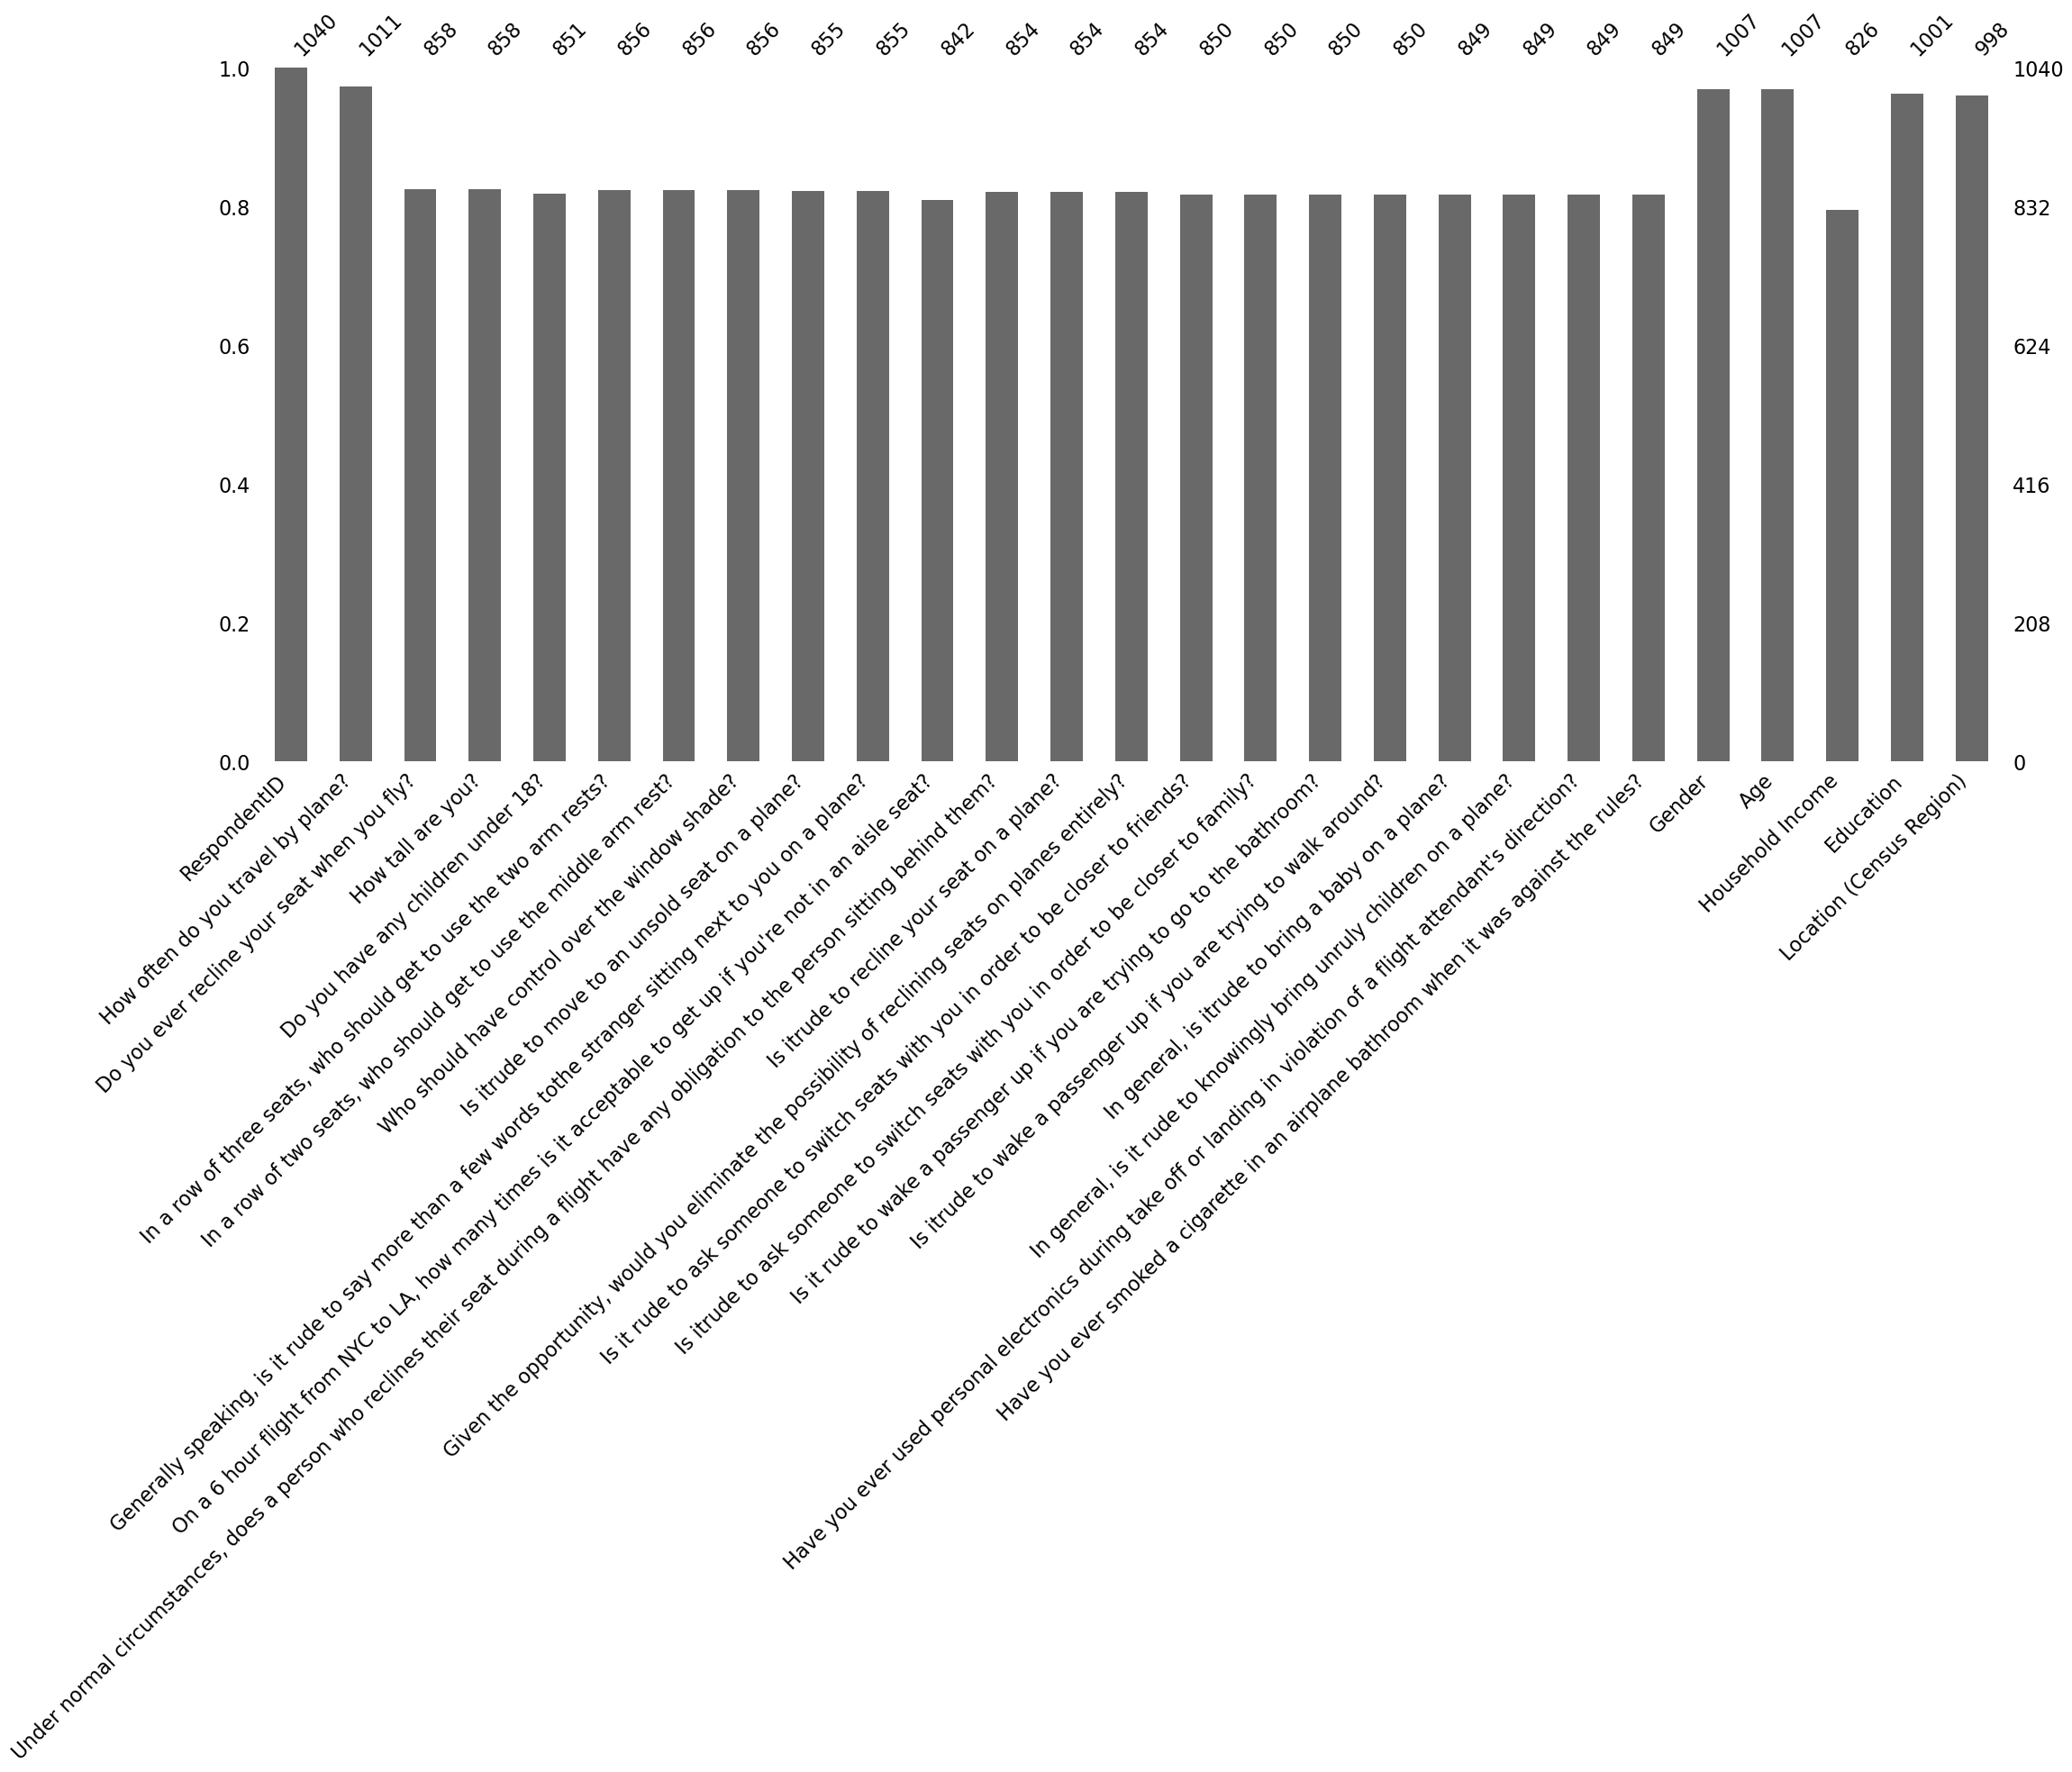

In [56]:
# How to deal with 353 na?
import missingno as msno
msno.bar(coded_df) # Bar chart, This shows the number of non-missing values for each variable. 

 # Remember to mention the limitation of imputation in the paper!

It shows if the 2nd question is missing, futher questions are all missing too, except some of them answer some demographic info. In those 182 cases, there are mostly two senarios: 1st question answered "0.0"(never flew)/ "1.0"(once a year or less)>--people who has very few flight experience. 

My idea would be firstly we cut off those 182 cases, i.e., keep 858 samples(82.5% of the orginial sample size), impute values for missing the question answers(mode imputation). And for income, there are 32 more people didn't answer this item, I will also impute it using regression of other variable.

Remember to mention the limitation in the paper! However, it's important to be cautious with mode imputation as it can introduce bias, especially if the missing data is not missing completely at random (MCAR). If the mode is distinctly different from the missing values' true distribution, this method can skew the dataset.

<Axes: >

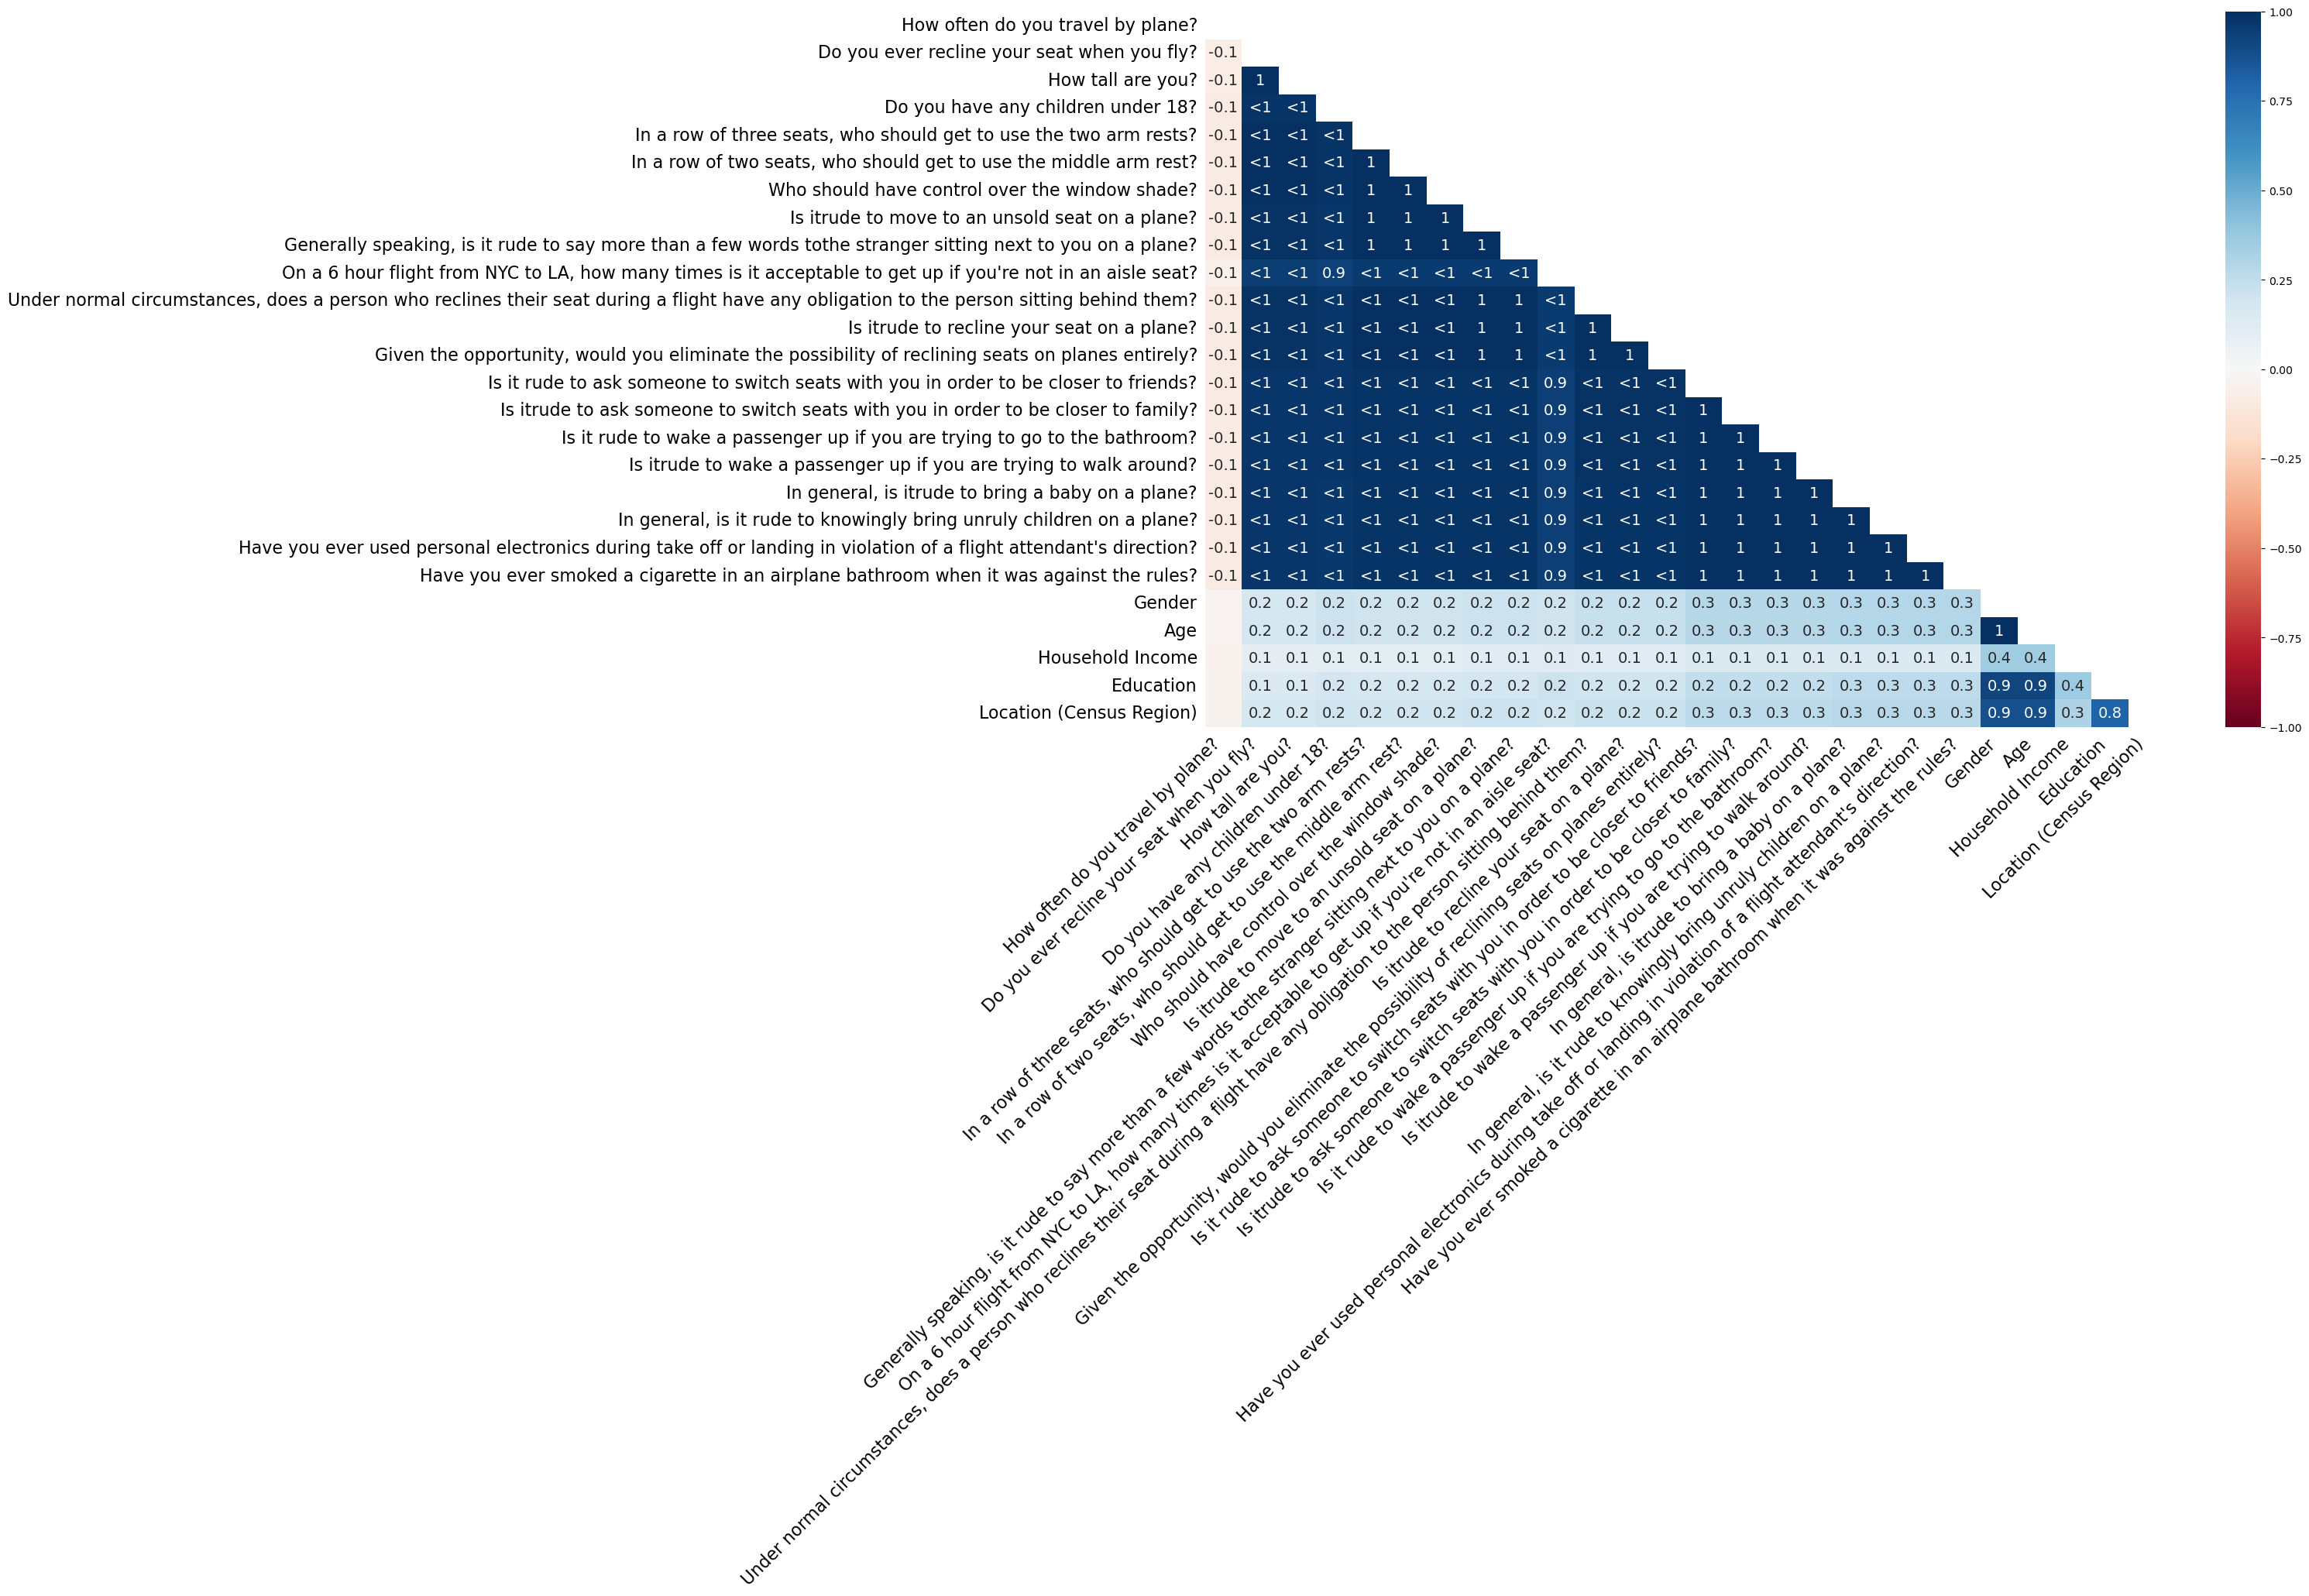

In [57]:
#This shows the correlation of missingness between each pair of variables.
msno.heatmap(coded_df) 

<Axes: >

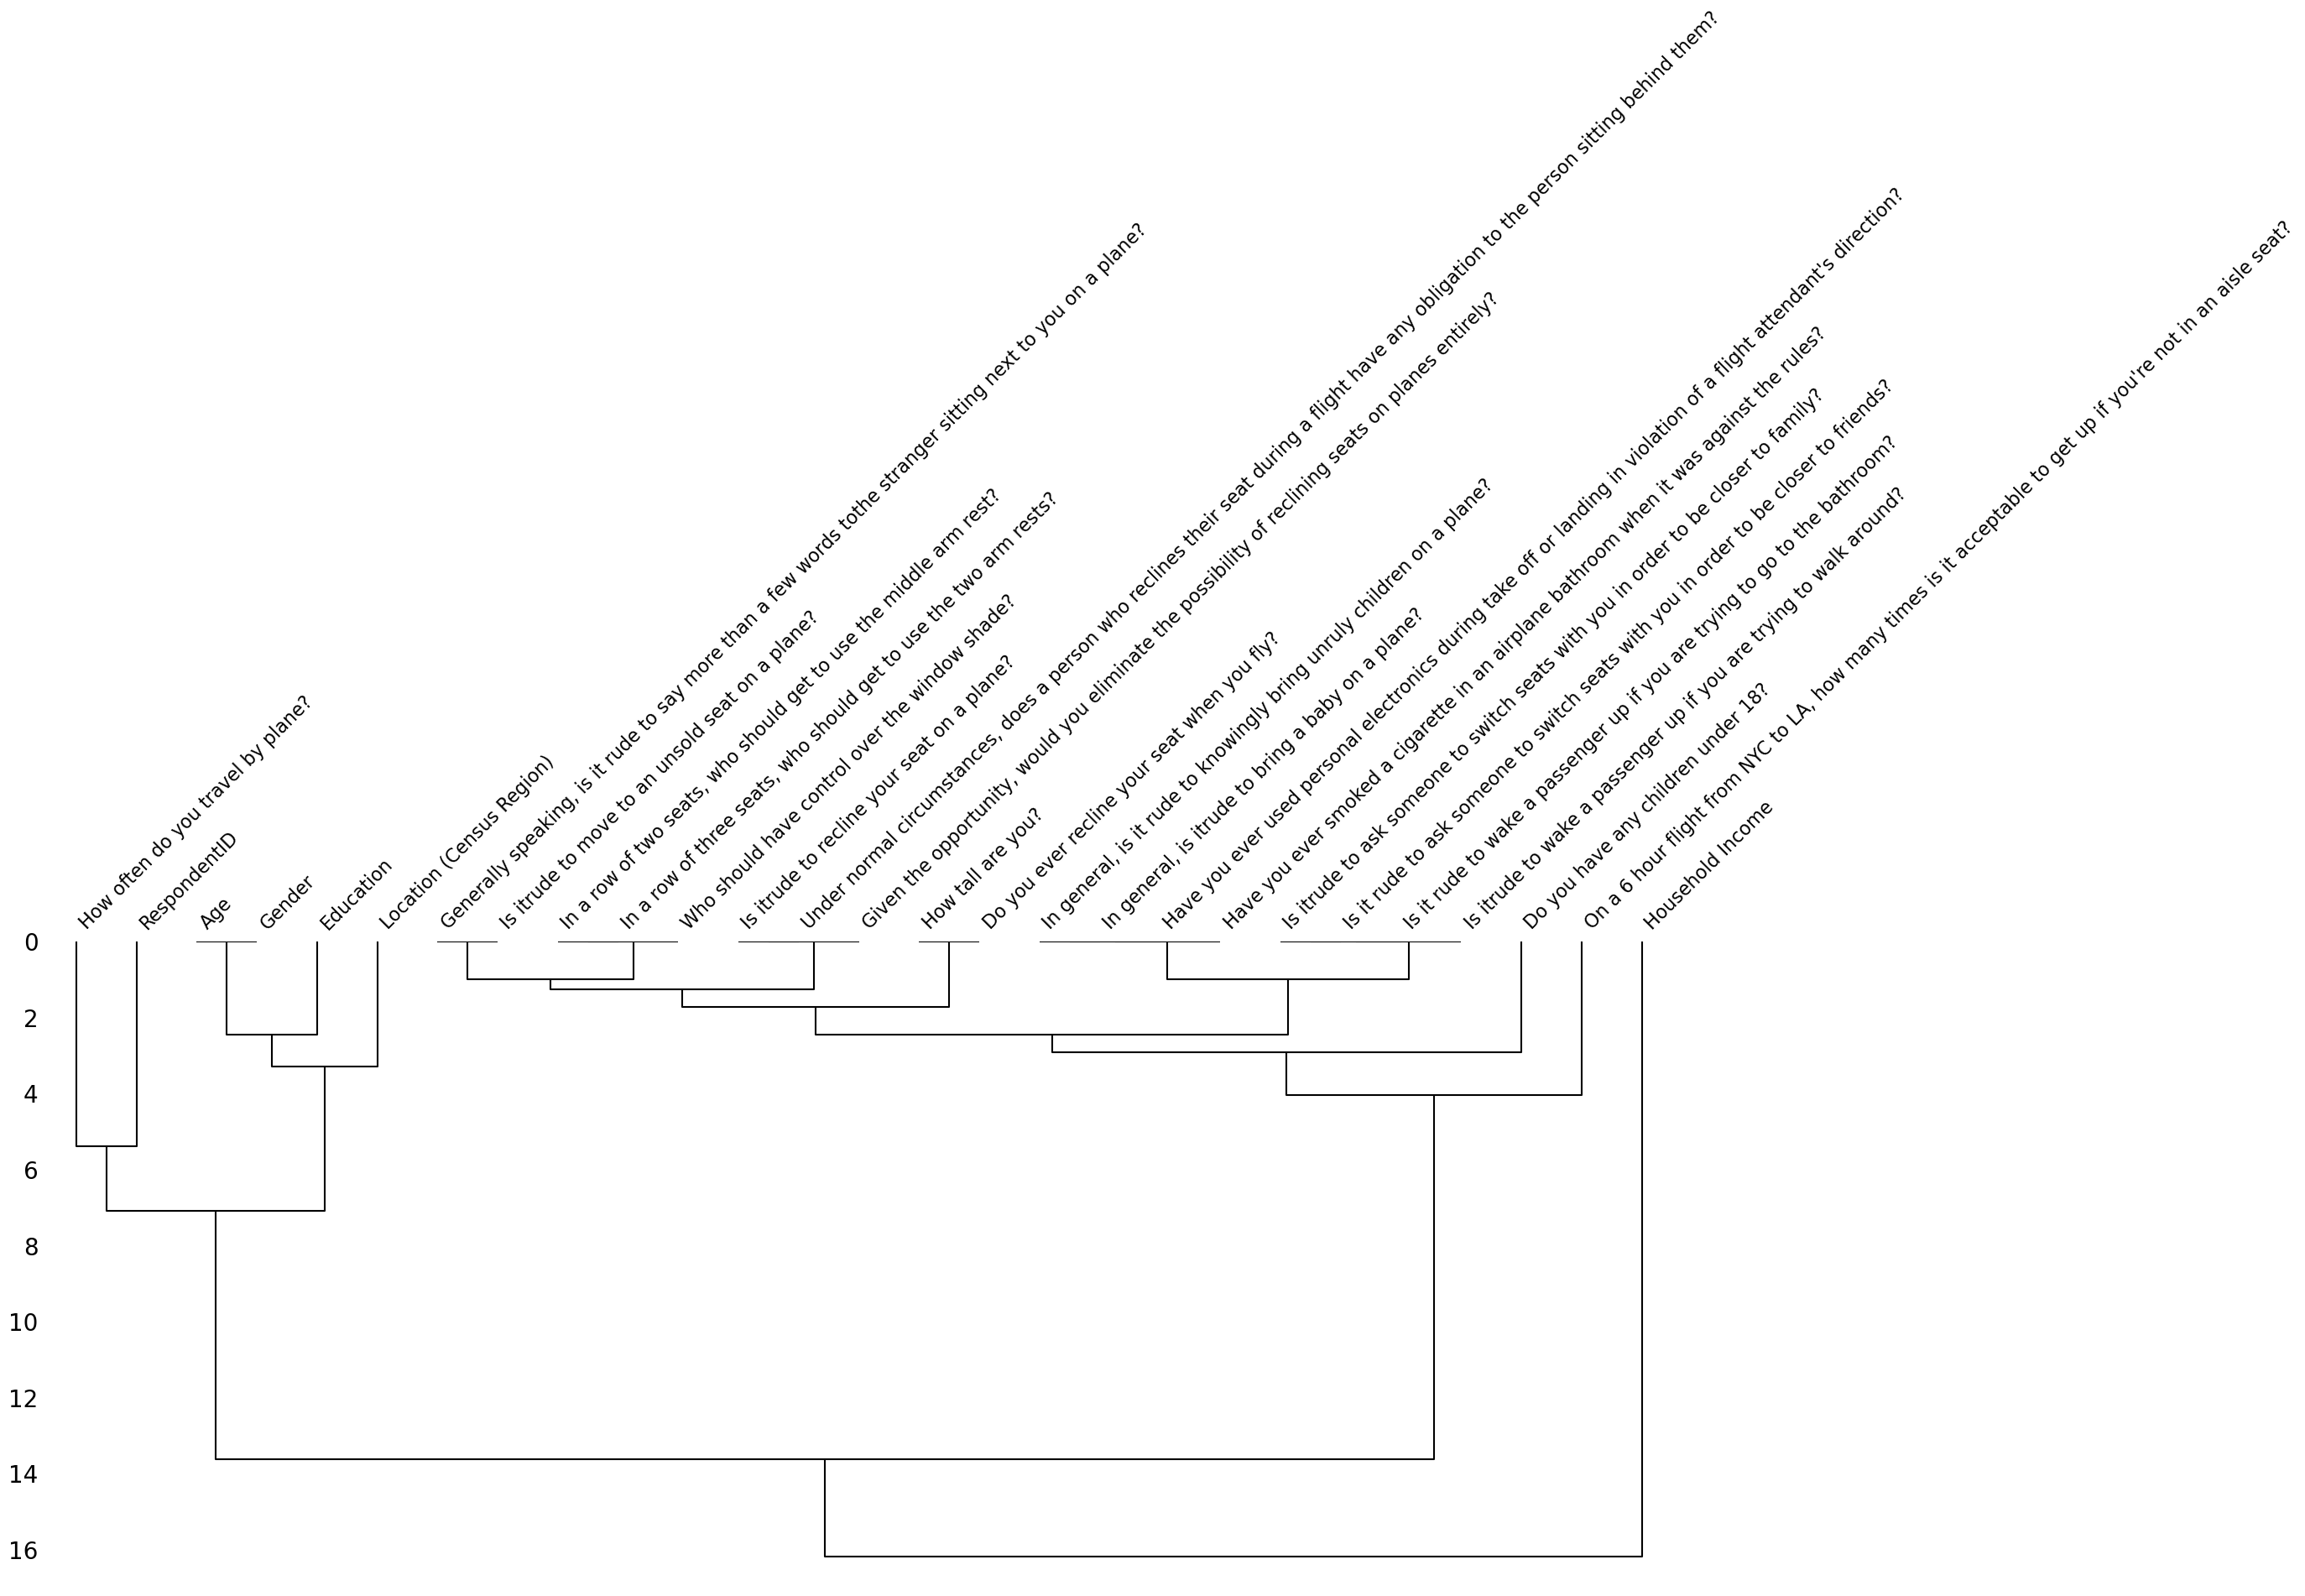

In [58]:
#This shows the hierarchical clustering 
#of the variables based on the presence of missing values.
msno.dendrogram(coded_df) 

In [59]:
# Find rows where the column has the value 0.0
rows_with_0 = coded_df[coded_df["How often do you travel by plane?"] == 0.0]

# Count the number of such rows
# About 16% of the sample never took a flight.
count = rows_with_0.shape[0]

print("Number of rows with '0.0' in 'How often do you travel by plane':", count)


# Find rows where the column has the value 1.0
# About 60.8% of the sample take flight "once a year or less".
rows_with_0 = coded_df[coded_df["How often do you travel by plane?"] == 1.0]

# Count the number of such rows
count = rows_with_0.shape[0]

print("Number of rows with '1.0' in 'How often do you travel by plane':", count)


missing_rows_1 = coded_df[coded_df["How often do you travel by plane?"].isna()]

# Count the number of such rows
count = missing_rows_1.shape[0]

print("Number of rows with 'na' in 'How often do you travel by plane':", count)

Number of rows with '0.0' in 'How often do you travel by plane': 166
Number of rows with '1.0' in 'How often do you travel by plane': 633
Number of rows with 'na' in 'How often do you travel by plane': 29


In [60]:
# We can talk about this portion as descriptive statistics, 
# But need to delete the missing entries of whom never took a flight.

In [61]:
missing_rows_2 = coded_df[coded_df["Do you ever recline your seat when you fly?"].isna()]
# Count the number of such rows
count = missing_rows_2.shape[0]
print("Number of rows with 'na' in 'Do you ever recline your seat when you fly':", count)

Number of rows with 'na' in 'Do you ever recline your seat when you fly': 182


## Cutting off 182 missing cases which had very limited experience of flying & imputation.

In [62]:
coded_df = coded_df[coded_df["Do you ever recline your seat when you fly?"].notna()]
coded_df.shape[0] # New dataset should have the size 858.

858

<Axes: >

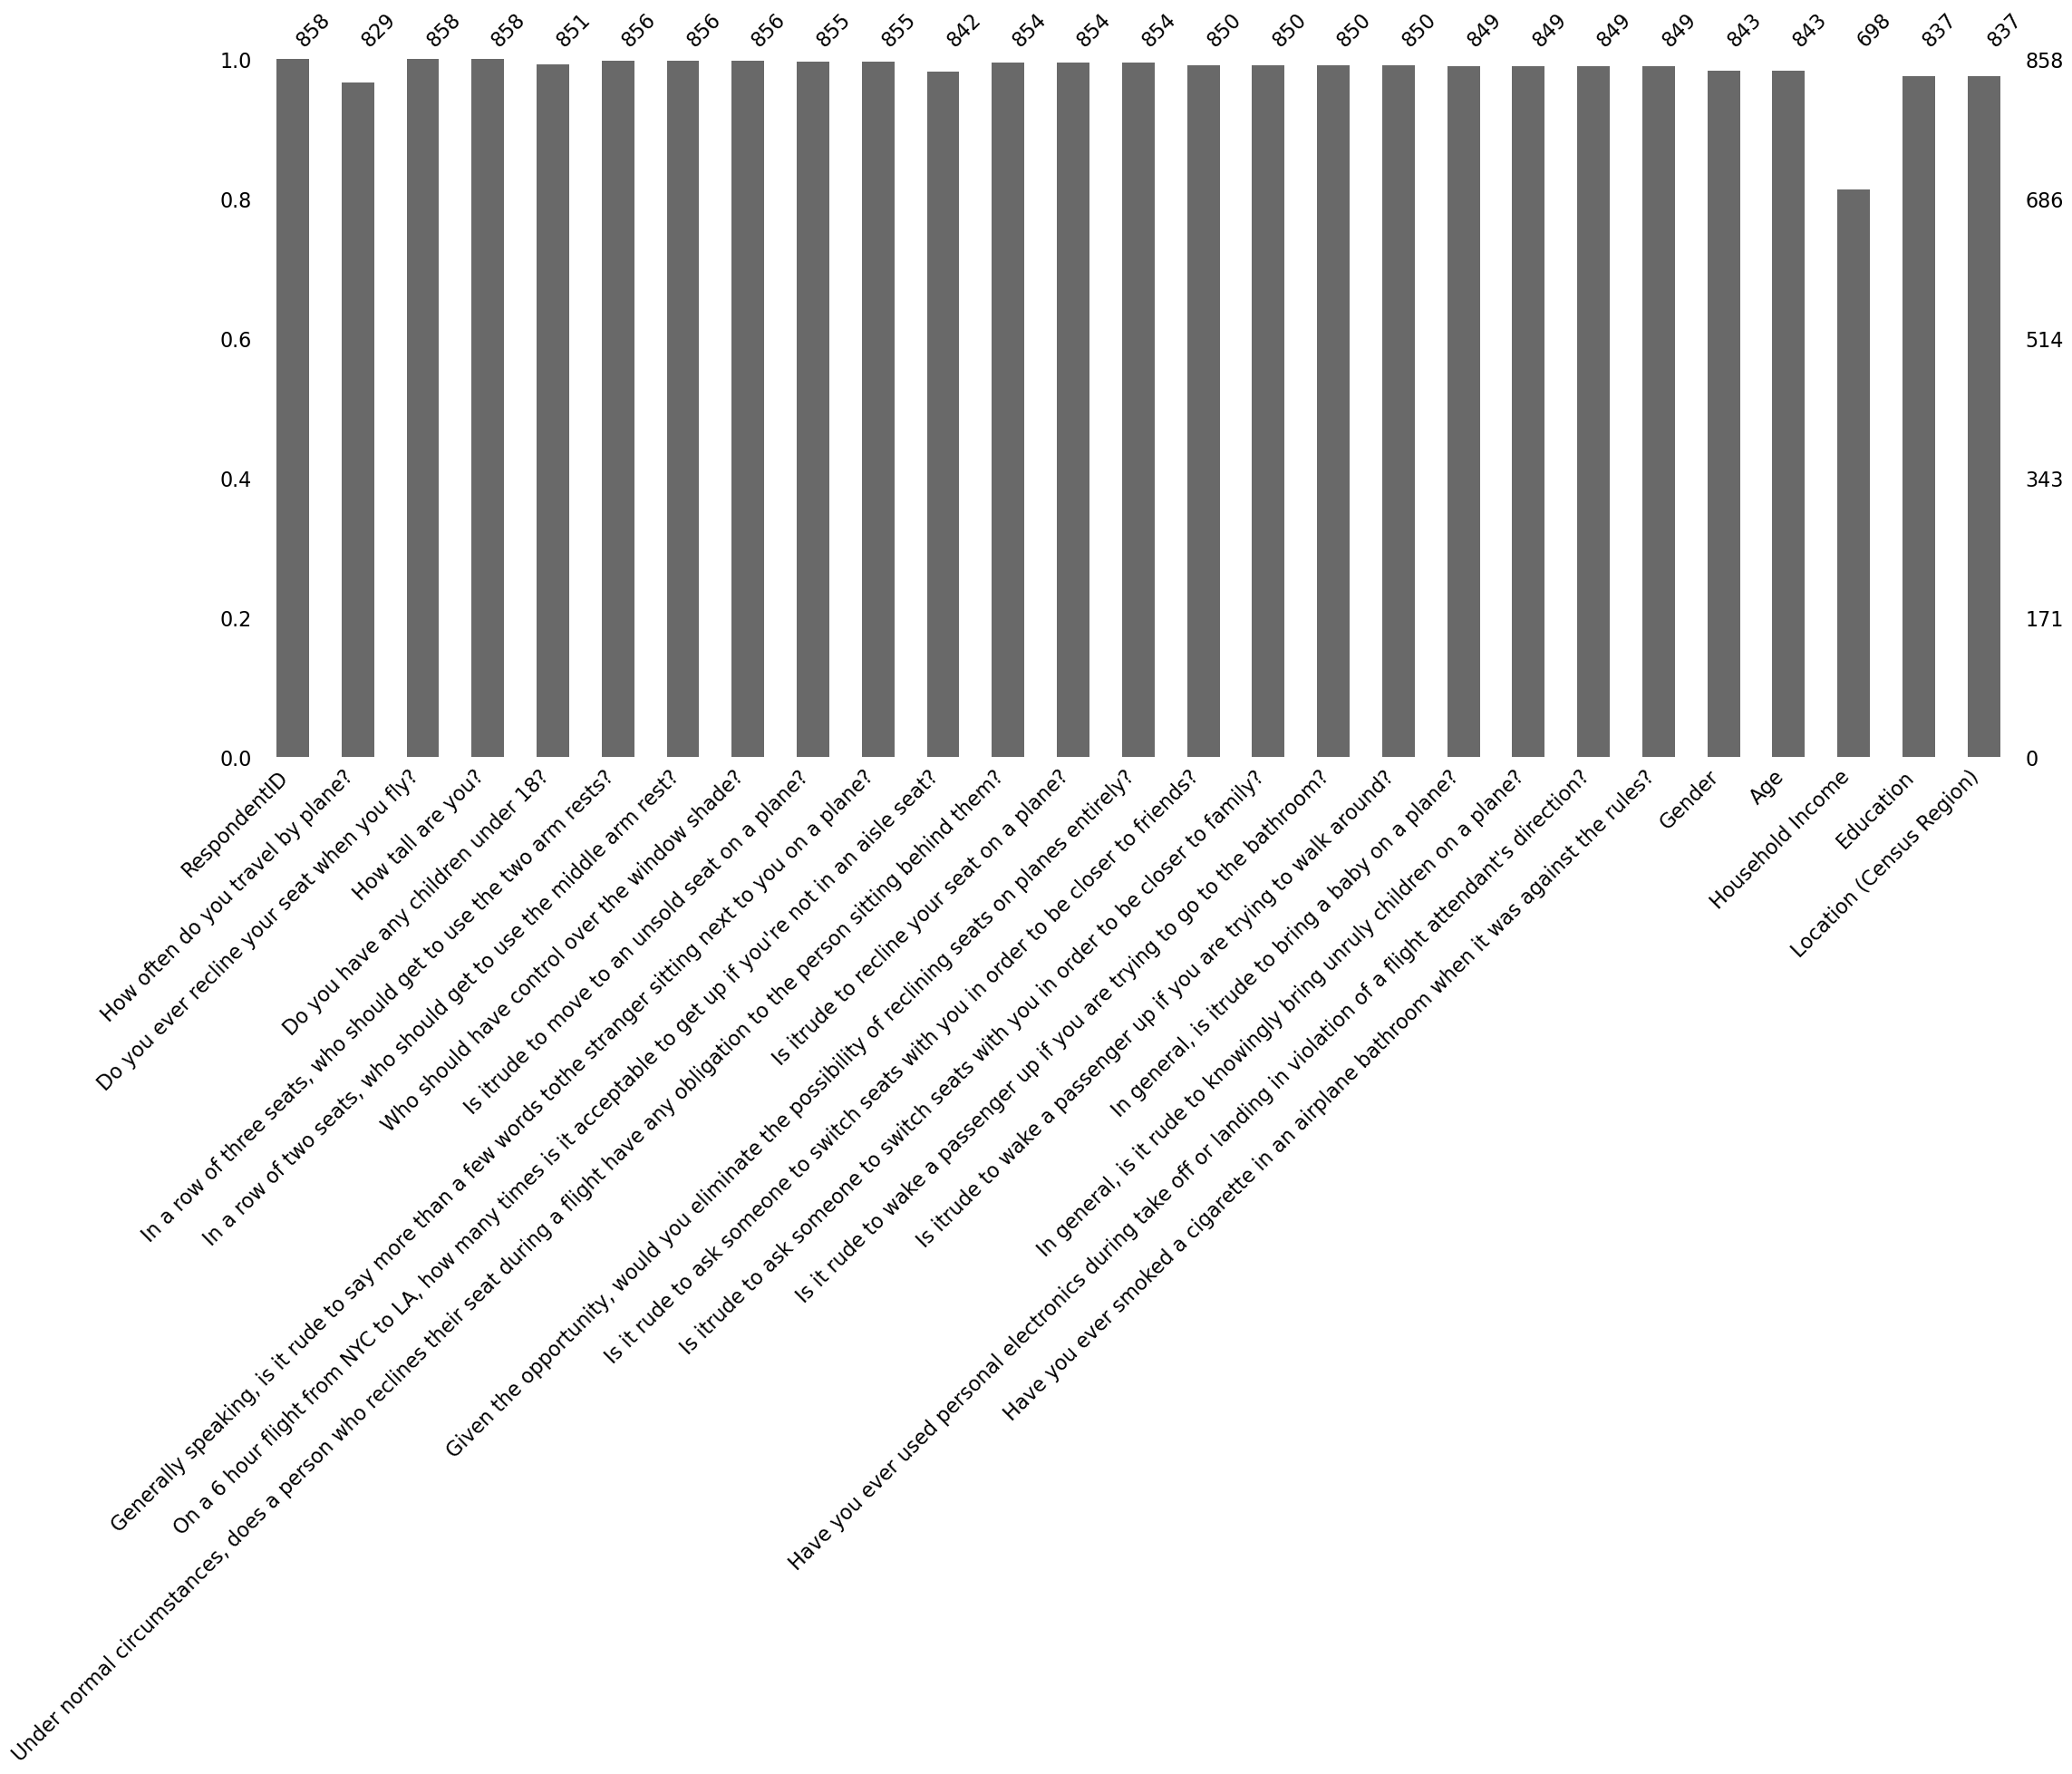

In [63]:
msno.bar(coded_df)
# Many people answered all questions but missed the first quesstion, thus, first question needs to be imputed to.
# For the questions, we can impute missing values by mode; for the demographic variables, we can random decide "Gender"(which can correct the gender bias?), use mode for "Age"(because there are fewer values in HI and Educ), impute nas of "household Income" in a regression way of "Education", 
# impute "location" with random decision but assuming the nas coming from the same distribution as the known responses??

In [64]:
coded_df.to_csv('/Users/xinqiaoyang/Desktop/coded_2.csv', index=False)

In [65]:
#Imputation of question part
import pandas as pd

# Assuming df is your DataFrame

# Replace the missing value in the columns with the mode
coded_df['How often do you travel by plane?'].fillna(coded_df['How often do you travel by plane?'].mode()[0], inplace=True)
coded_df['Do you have any children under 18?'].fillna(coded_df['Do you have any children under 18?'].mode()[0], inplace=True)
coded_df['In a row of three seats, who should get to use the two arm rests?'].fillna(coded_df['In a row of three seats, who should get to use the two arm rests?'].mode()[0], inplace=True)
coded_df['In a row of two seats, who should get to use the middle arm rest?'].fillna(coded_df['In a row of two seats, who should get to use the middle arm rest?'].mode()[0], inplace=True)
coded_df['Who should have control over the window shade?'].fillna(coded_df['Who should have control over the window shade?'].mode()[0], inplace=True)
coded_df['Is itrude to move to an unsold seat on a plane?'].fillna(coded_df['Is itrude to move to an unsold seat on a plane?'].mode()[0], inplace=True)
coded_df['Generally speaking, is it rude to say more than a few words tothe stranger sitting next to you on a plane?'].fillna(coded_df['Generally speaking, is it rude to say more than a few words tothe stranger sitting next to you on a plane?'].mode()[0], inplace=True)
coded_df['On a 6 hour flight from NYC to LA, how many times is it acceptable to get up if you\'re not in an aisle seat?'].fillna(coded_df['On a 6 hour flight from NYC to LA, how many times is it acceptable to get up if you\'re not in an aisle seat?'].mode()[0], inplace=True)
coded_df['Under normal circumstances, does a person who reclines their seat during a flight have any obligation to the person sitting behind them?'].fillna(coded_df['Under normal circumstances, does a person who reclines their seat during a flight have any obligation to the person sitting behind them?'].mode()[0], inplace=True)
coded_df['Is itrude to recline your seat on a plane?'].fillna(coded_df['Is itrude to recline your seat on a plane?'].mode()[0], inplace=True)
coded_df['Given the opportunity, would you eliminate the possibility of reclining seats on planes entirely?'].fillna(coded_df['Given the opportunity, would you eliminate the possibility of reclining seats on planes entirely?'].mode()[0], inplace=True)
coded_df['Is it rude to ask someone to switch seats with you in order to be closer to friends?'].fillna(coded_df['Is it rude to ask someone to switch seats with you in order to be closer to friends?'].mode()[0], inplace=True)
coded_df['Is itrude to ask someone to switch seats with you in order to be closer to family?'].fillna(coded_df['Is itrude to ask someone to switch seats with you in order to be closer to family?'].mode()[0], inplace=True)
coded_df['Is it rude to wake a passenger up if you are trying to go to the bathroom?'].fillna(coded_df['Is it rude to wake a passenger up if you are trying to go to the bathroom?'].mode()[0], inplace=True)
coded_df['Is itrude to wake a passenger up if you are trying to walk around?'].fillna(coded_df['Is itrude to wake a passenger up if you are trying to walk around?'].mode()[0], inplace=True)
coded_df['In general, is itrude to bring a baby on a plane?'].fillna(coded_df['In general, is itrude to bring a baby on a plane?'].mode()[0], inplace=True)
coded_df['In general, is it rude to knowingly bring unruly children on a plane?'].fillna(coded_df['In general, is it rude to knowingly bring unruly children on a plane?'].mode()[0], inplace=True)
coded_df['Have you ever used personal electronics during take off or landing in violation of a flight attendant\'s direction?'].fillna(coded_df['Have you ever used personal electronics during take off or landing in violation of a flight attendant\'s direction?'].mode()[0], inplace=True)
coded_df['Have you ever smoked a cigarette in an airplane bathroom when it was against the rules?'].fillna(coded_df['Have you ever smoked a cigarette in an airplane bathroom when it was against the rules?'].mode()[0], inplace=True)

<Axes: >

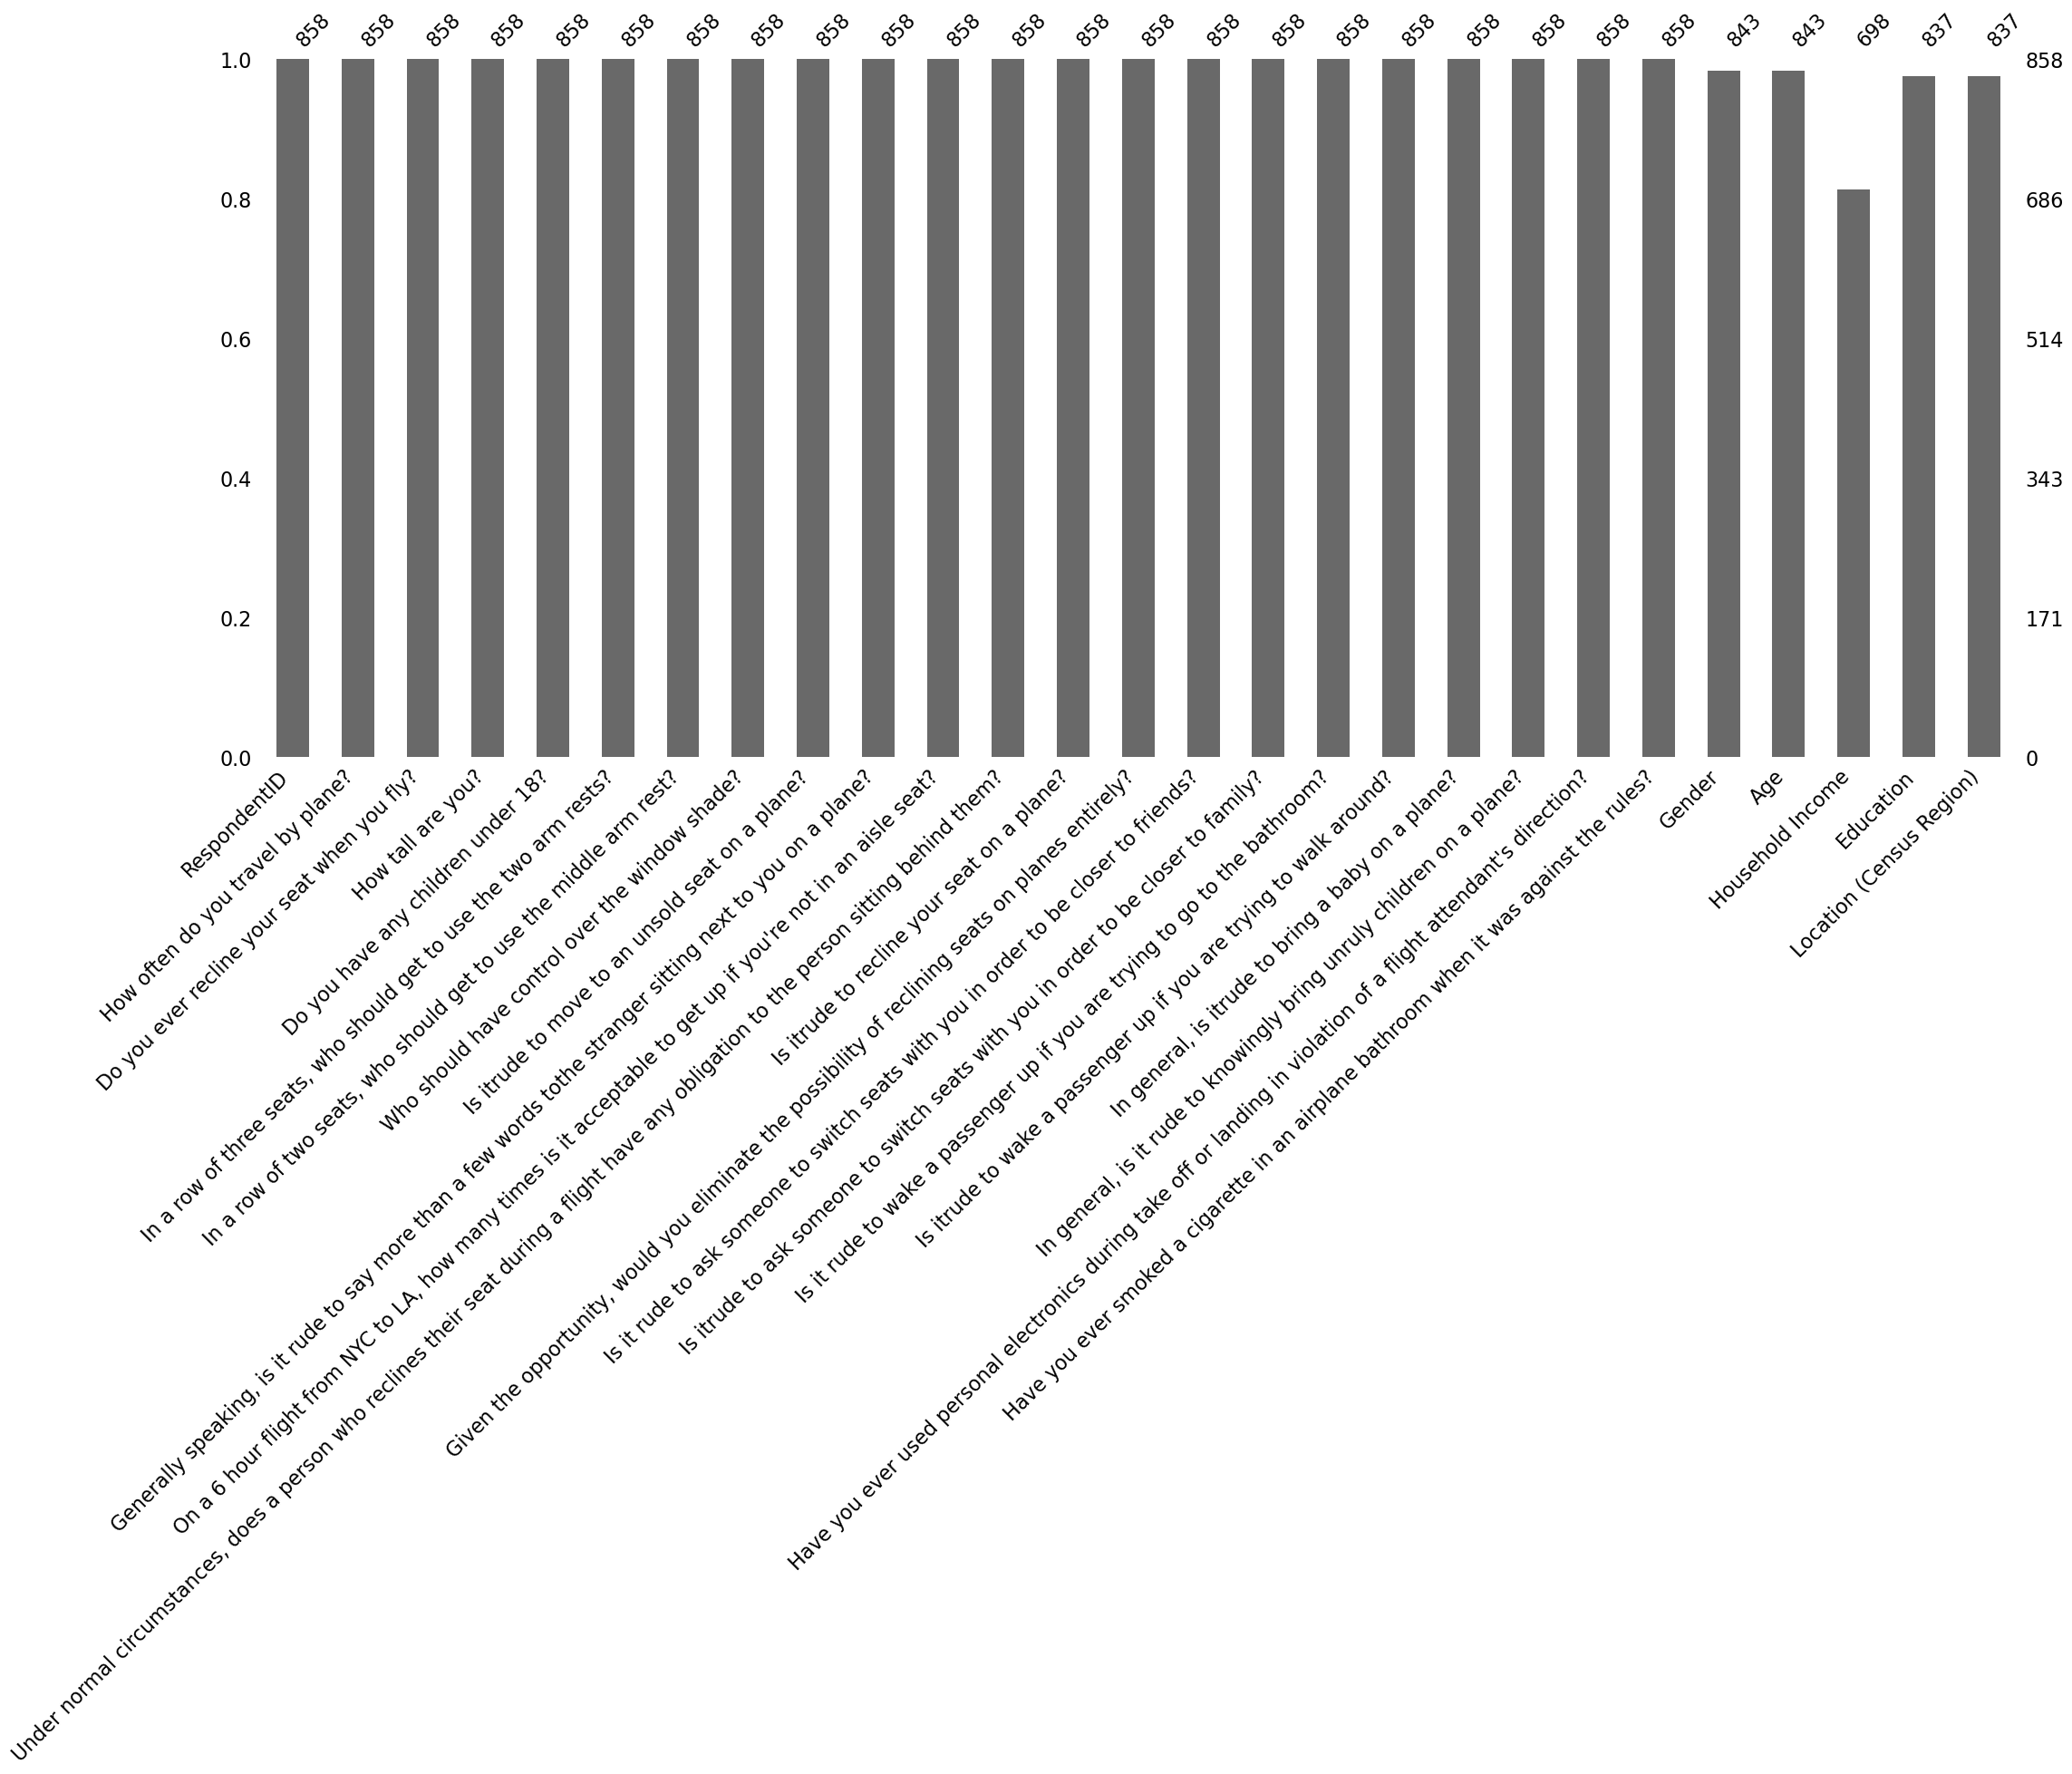

In [66]:
msno.bar(coded_df)

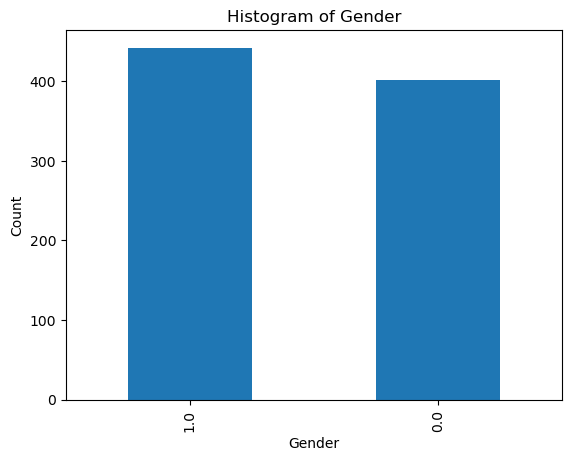

1.0    442
0.0    401
Name: Gender, dtype: int64

In [67]:
import matplotlib.pyplot as plt
# Plotting the histogram for the 'Gender' column
coded_df['Gender'].value_counts().plot(kind='bar')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Histogram of Gender')
plt.show()
# Male size is smaller than Female size in the original sample.
coded_df['Gender'].value_counts()

# Check gender bias etc., some techniques to correct the bias?

We will probably only introduce more bias, for safer analysis better use original but coded dataset, however, with MCA we will try it with the imputated version later too since MCA could not deal with missing values.

In [68]:
# Imputation of demographic parts: Since household income and education has a significant association.
# I will impute these "household income" in a regression way. notice:The model assumes a linear relationship between "Education" and "Household Income"(stronger than "HI" And "Age",see later Spearman correlation). 
# If the relationship is not linear, this model might not perform well.
# We can't infer Gender, so the missing value will be imputed in a random decision way.

### Function to randomly decide gender with 90% probability for male, since Male population is a bit less than Female in the sample, we can correct it.
import numpy as np
import random
from sklearn.linear_model import LinearRegression
def random_gender():
    random.seed(42)
    return np.random.choice([0, 1],p=[0.9, 0.1])
# Applying the function to fill missing values in 'Gender' column
coded_df['Gender'] = coded_df['Gender'].apply(lambda x: random_gender() if pd.isna(x) else x)

In [69]:
coded_df['Gender'].value_counts()


1.0    446
0.0    412
Name: Gender, dtype: int64

In [70]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Assuming you have a pandas DataFrame named 'coded_df' with columns 'Household Income' and 'Education'

# Step 1: Prepare the Data
# Filter out rows where either 'Household Income' or 'Education' is missing
train_df = coded_df.dropna(subset=['Household Income', 'Education'])

# Step 2: Train a Linear Regression Model
X_train = train_df[['Education']]
y_train = train_df['Household Income']

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 3: Predict Missing 'Household Income' Values
# Select rows where 'Household Income' is missing but 'Education' is not
predict_df = coded_df[coded_df['Household Income'].isnull() & coded_df['Education'].notnull()]

X_predict = predict_df[['Education']]
predicted_income = model.predict(X_predict)
predicted_income = predicted_income.round().astype(int)
# Step 4: Update the DataFrame
coded_df.loc[predict_df.index, 'Household Income'] = predicted_income

# Now 'coded_df' has the missing values in 'Household Income' filled in based on 'Education'
#print(coded_df)


<Axes: >

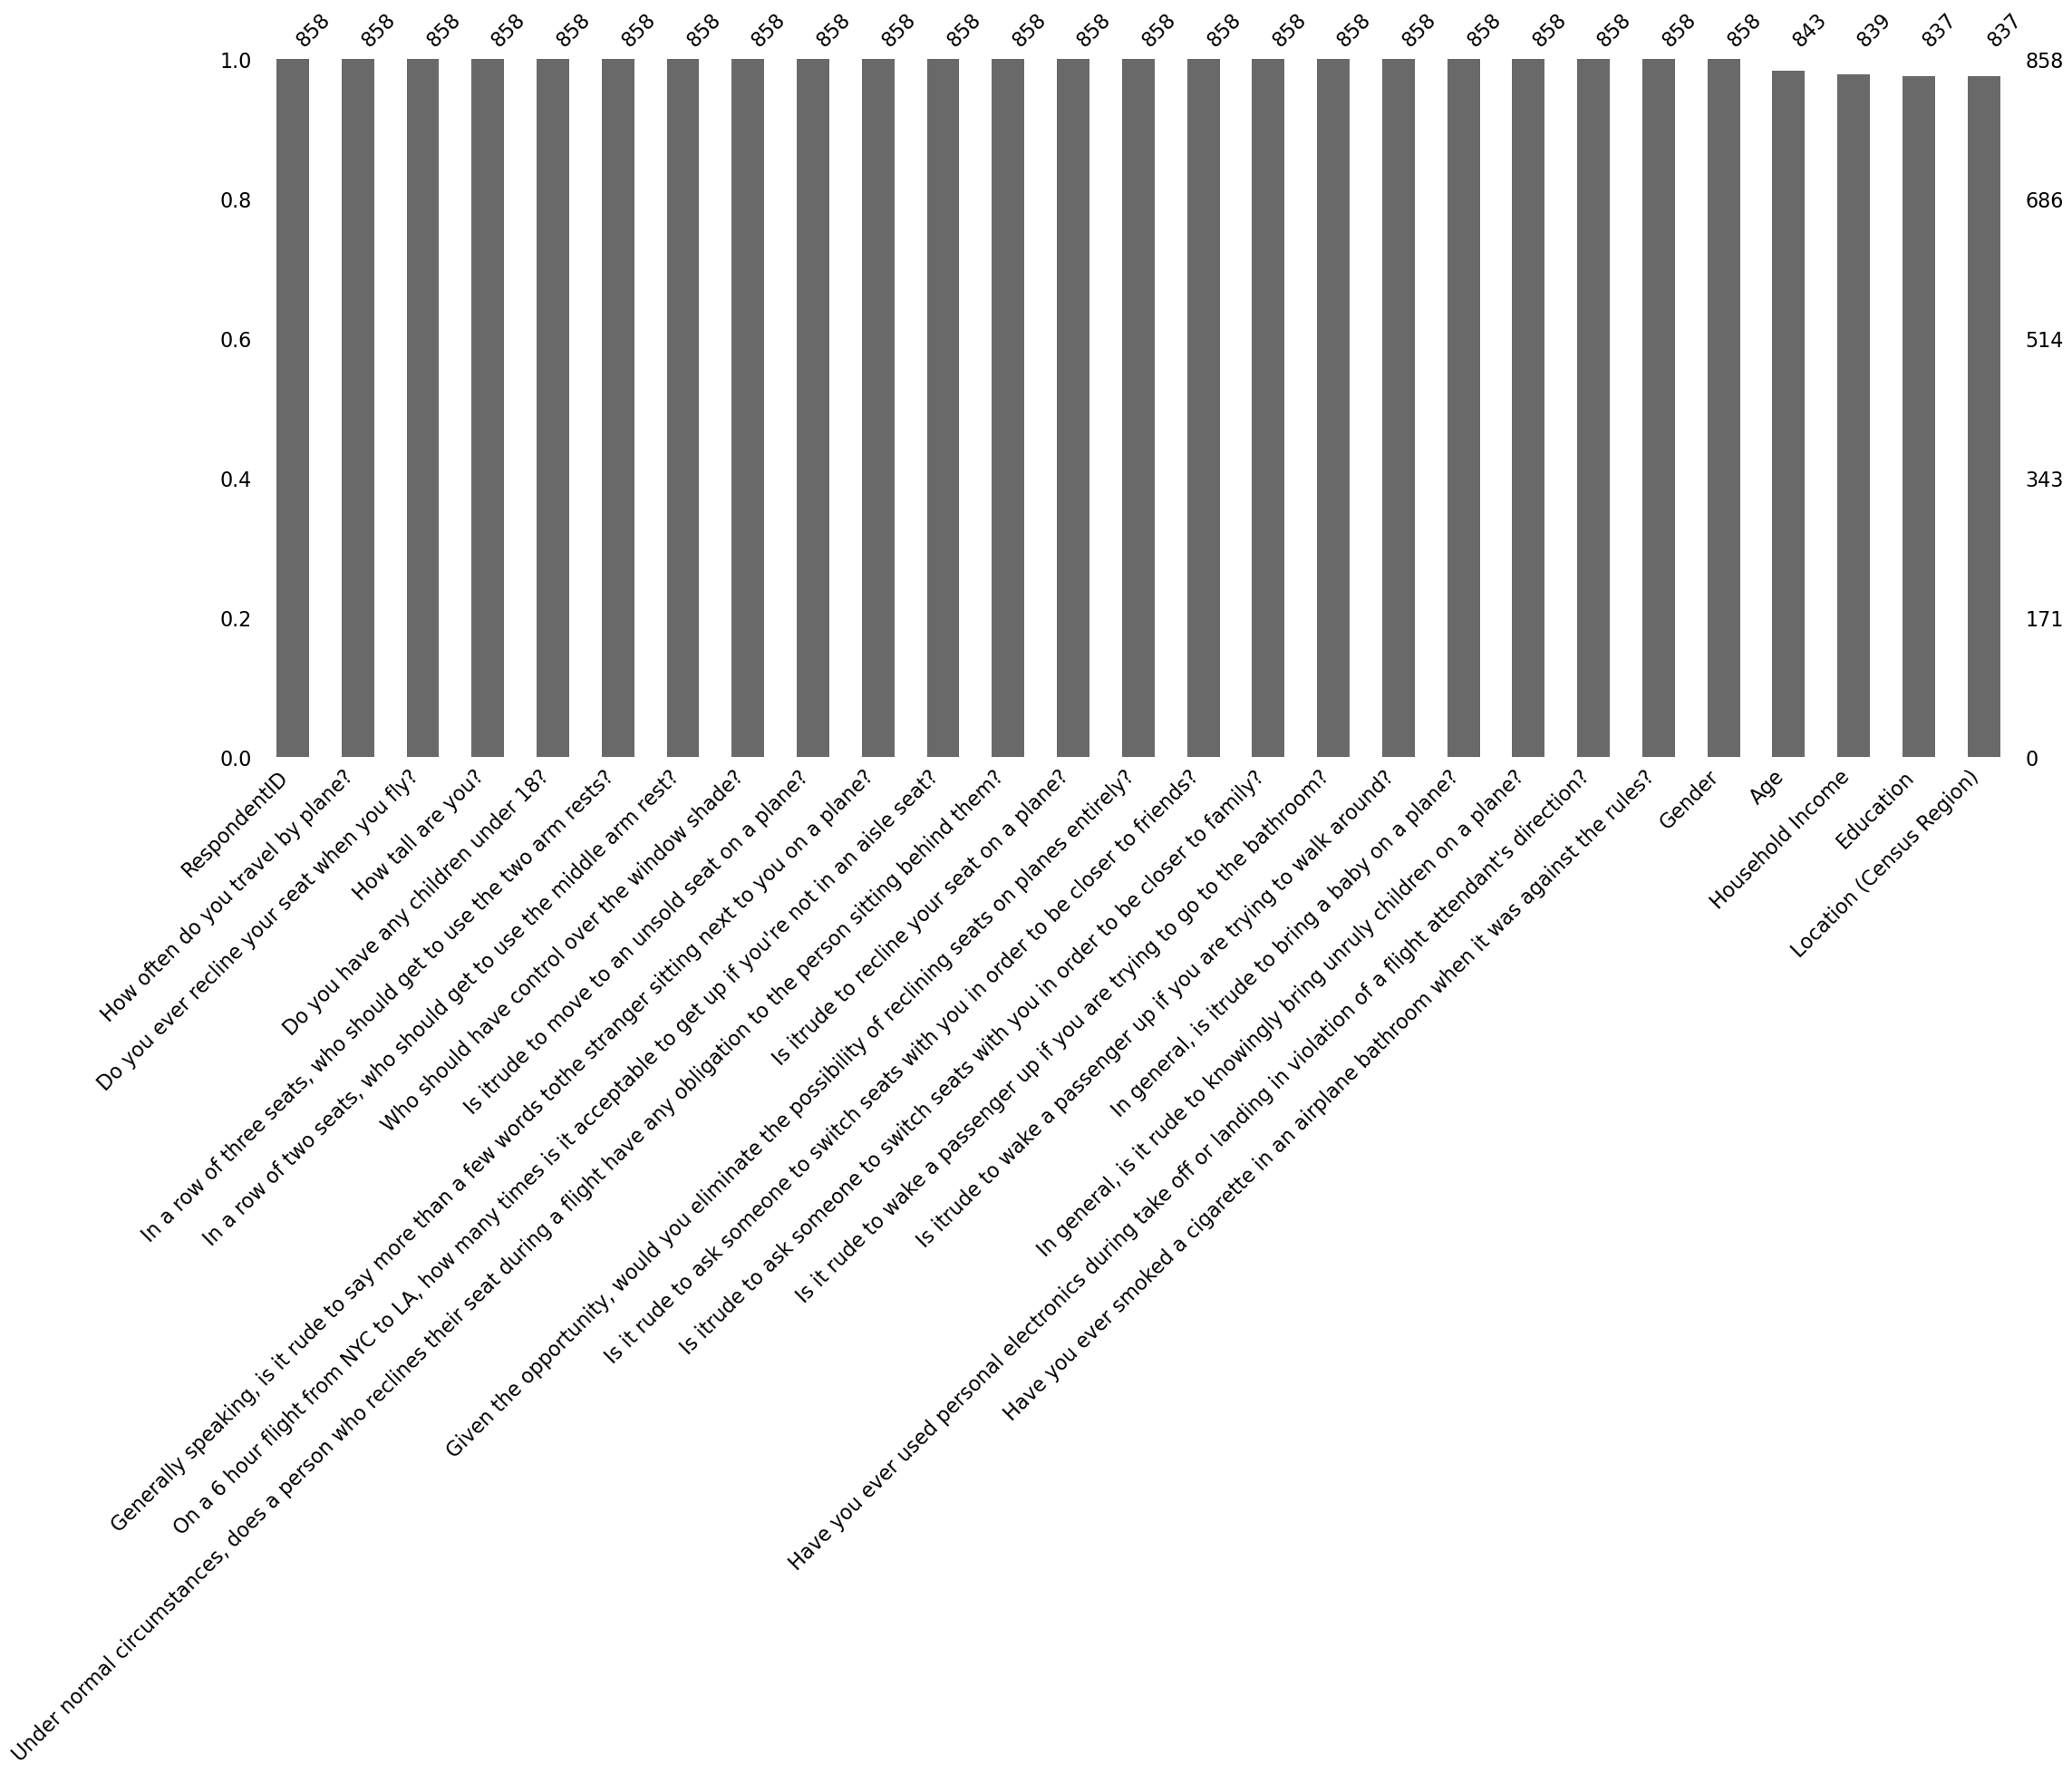

In [71]:
msno.bar(coded_df)

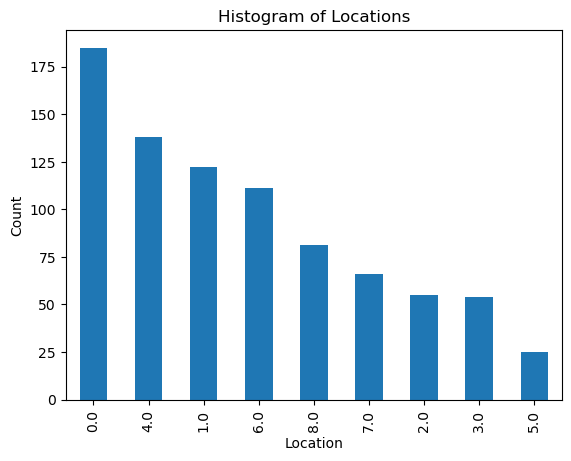

In [72]:
import matplotlib.pyplot as plt
# Plotting the histogram for the 'location' column
coded_df['Location (Census Region)'].value_counts().plot(kind='bar')
plt.xlabel('Location')
plt.ylabel('Count')
plt.title('Histogram of Locations')
plt.show()

In [73]:
coded_df['Location (Census Region)'].value_counts()

0.0    185
4.0    138
1.0    122
6.0    111
8.0     81
7.0     66
2.0     55
3.0     54
5.0     25
Name: Location (Census Region), dtype: int64

In [74]:
#"Location" could not be implied by other columns, impute them in. a random decision assuming missing value coming from the same distribution as the responses we known.
from scipy.stats import rv_discrete
estimated_counts= [185, 138, 122, 111, 81, 66, 55, 54, 25]

# Normalizing the estimated counts to sum to 1 for probability distribution
total_counts = sum(estimated_counts)
probabilities = [count / total_counts for count in estimated_counts]

# Defining the possible location values, assumed to be from 0 to 8 as seen on the x-axis of the histogram
location_values = np.arange(0, 9)

# Creating a custom discrete random variable with the estimated probabilities
custom_dist = rv_discrete(values=(location_values, probabilities))

# Applying the custom distribution to fill missing values in 'Location' column
coded_df['Location (Census Region)'] = coded_df['Location (Census Region)'].apply(lambda x: custom_dist.rvs() if pd.isna(x) else x)

<Axes: >

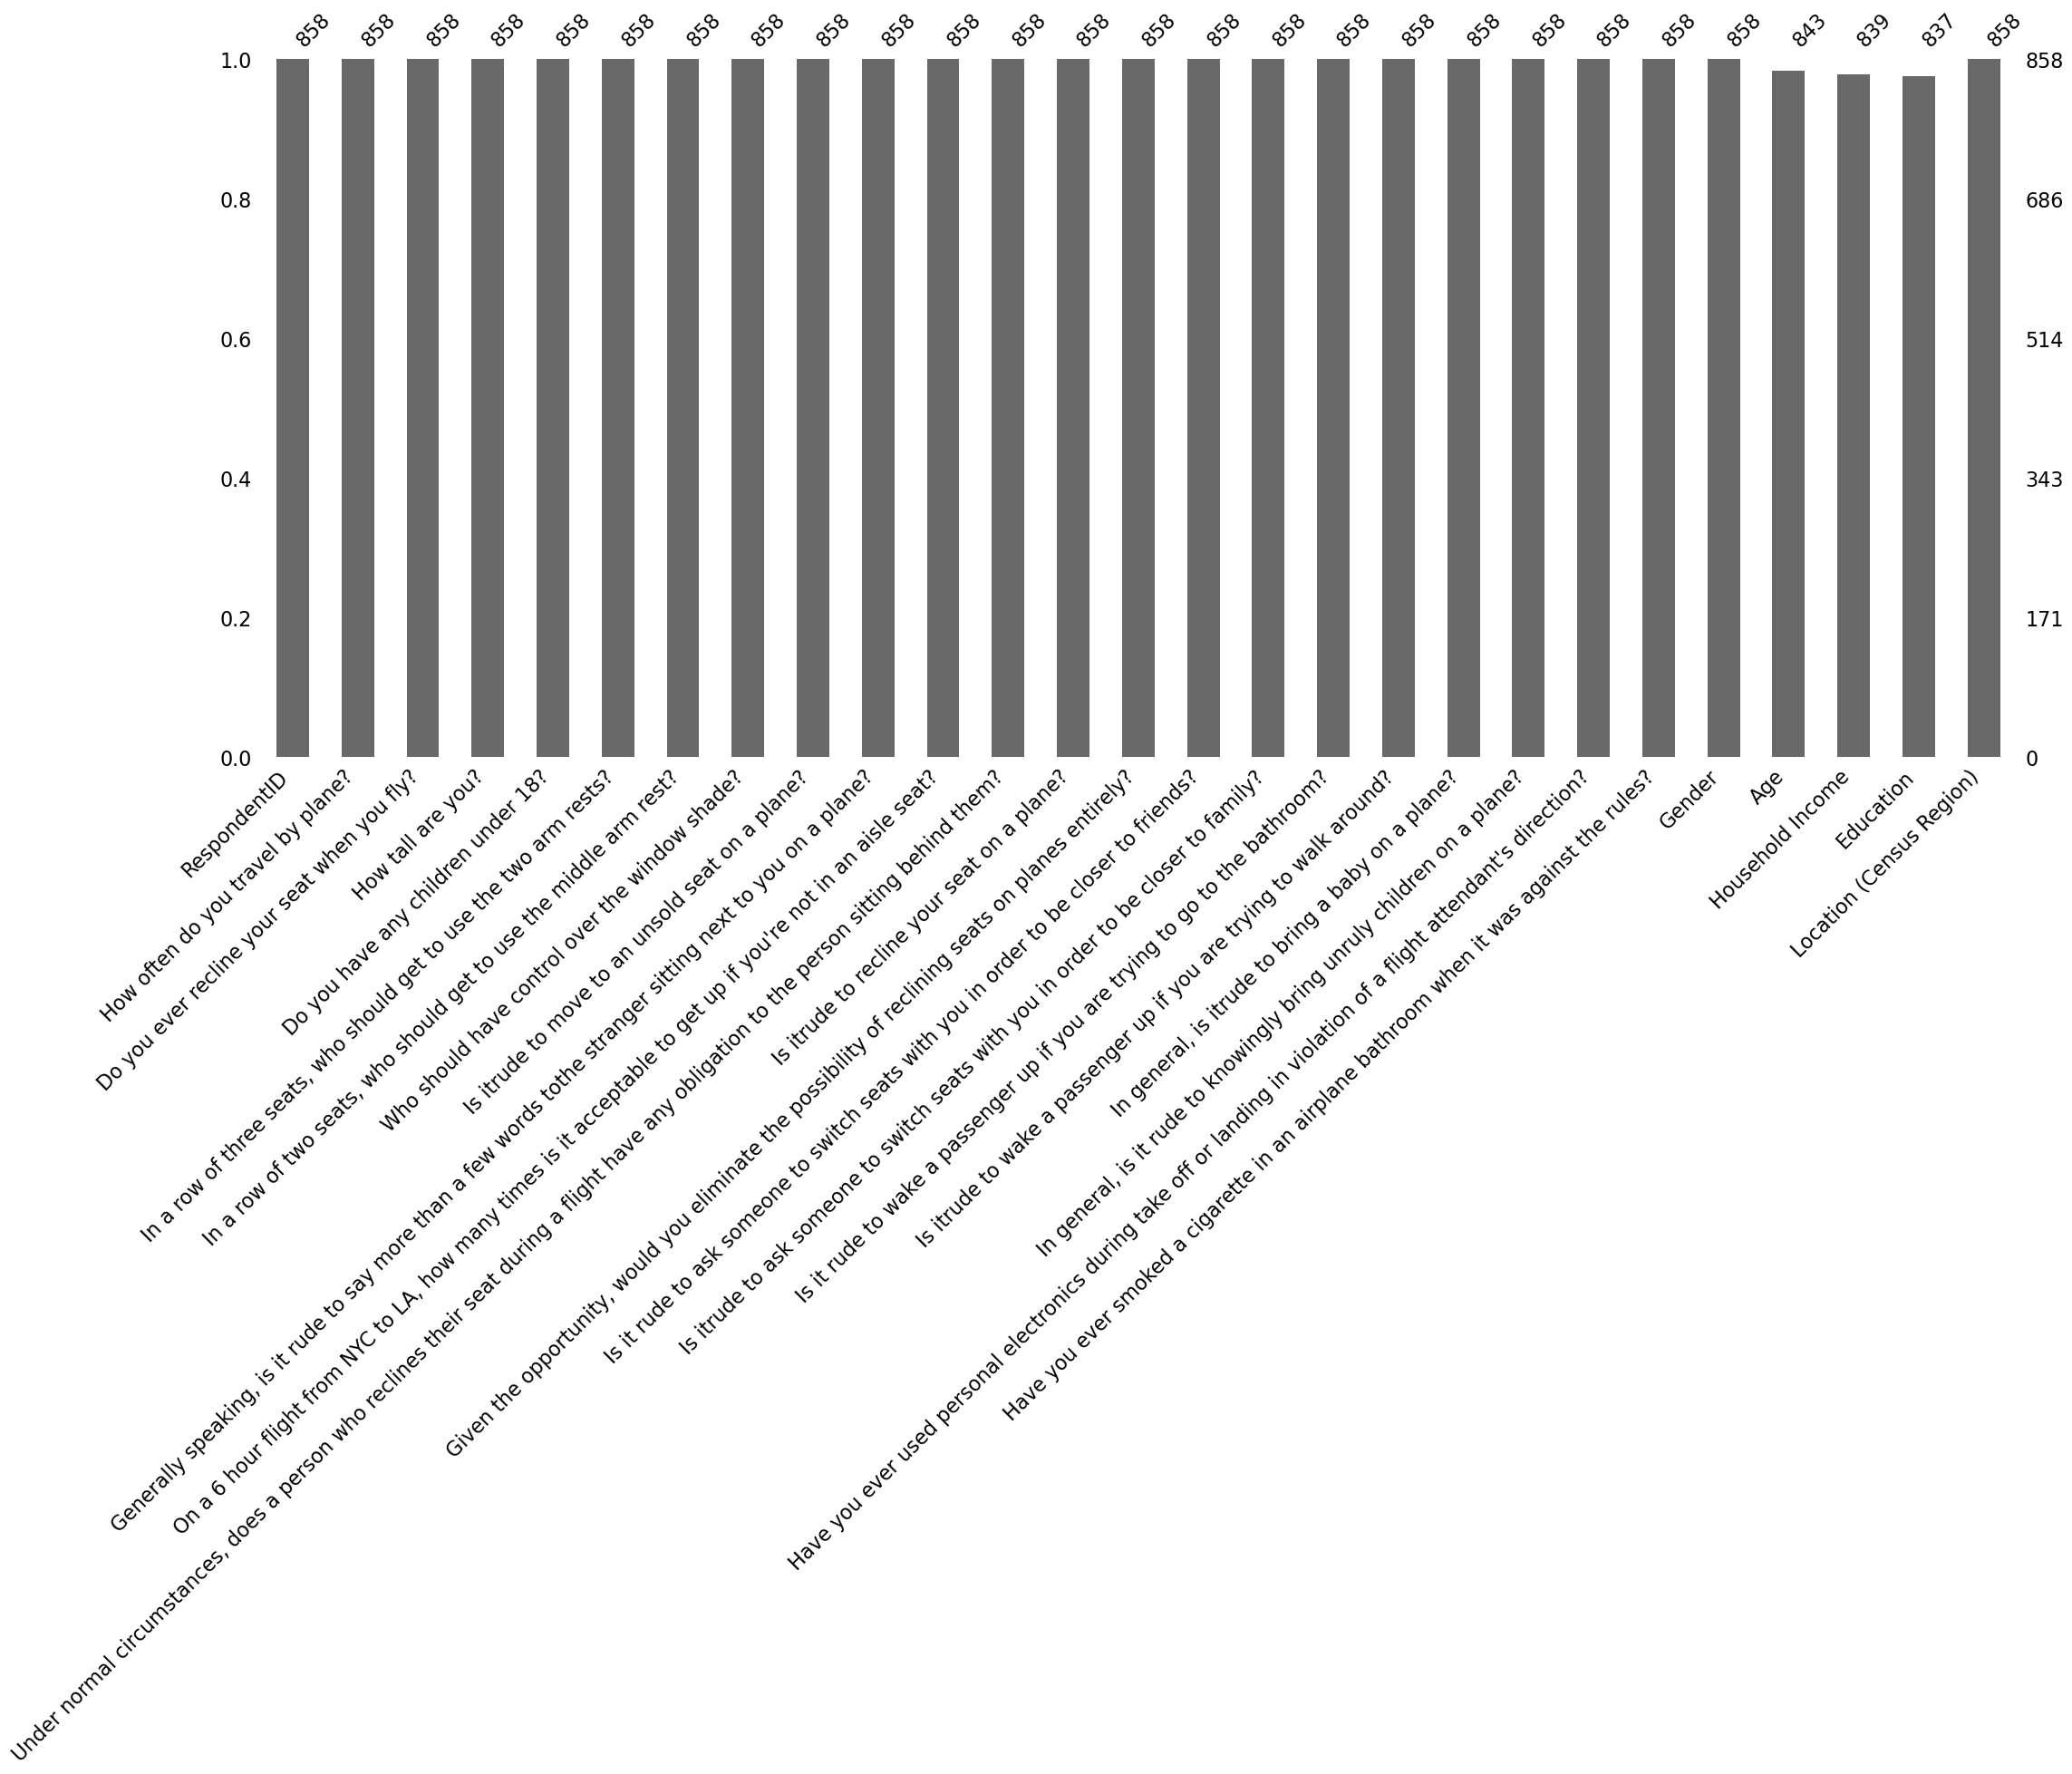

In [75]:
msno.bar(coded_df)

In [76]:
###Remaining few missing values from "Age","Household Income" and "Education" can be imputed via mode.
coded_df['Age'].fillna(coded_df['Age'].mode()[0], inplace=True)
coded_df['Household Income'].fillna(coded_df['Household Income'].mode()[0], inplace=True)
coded_df['Education'].fillna(coded_df['Education'].mode()[0], inplace=True)


<Axes: >

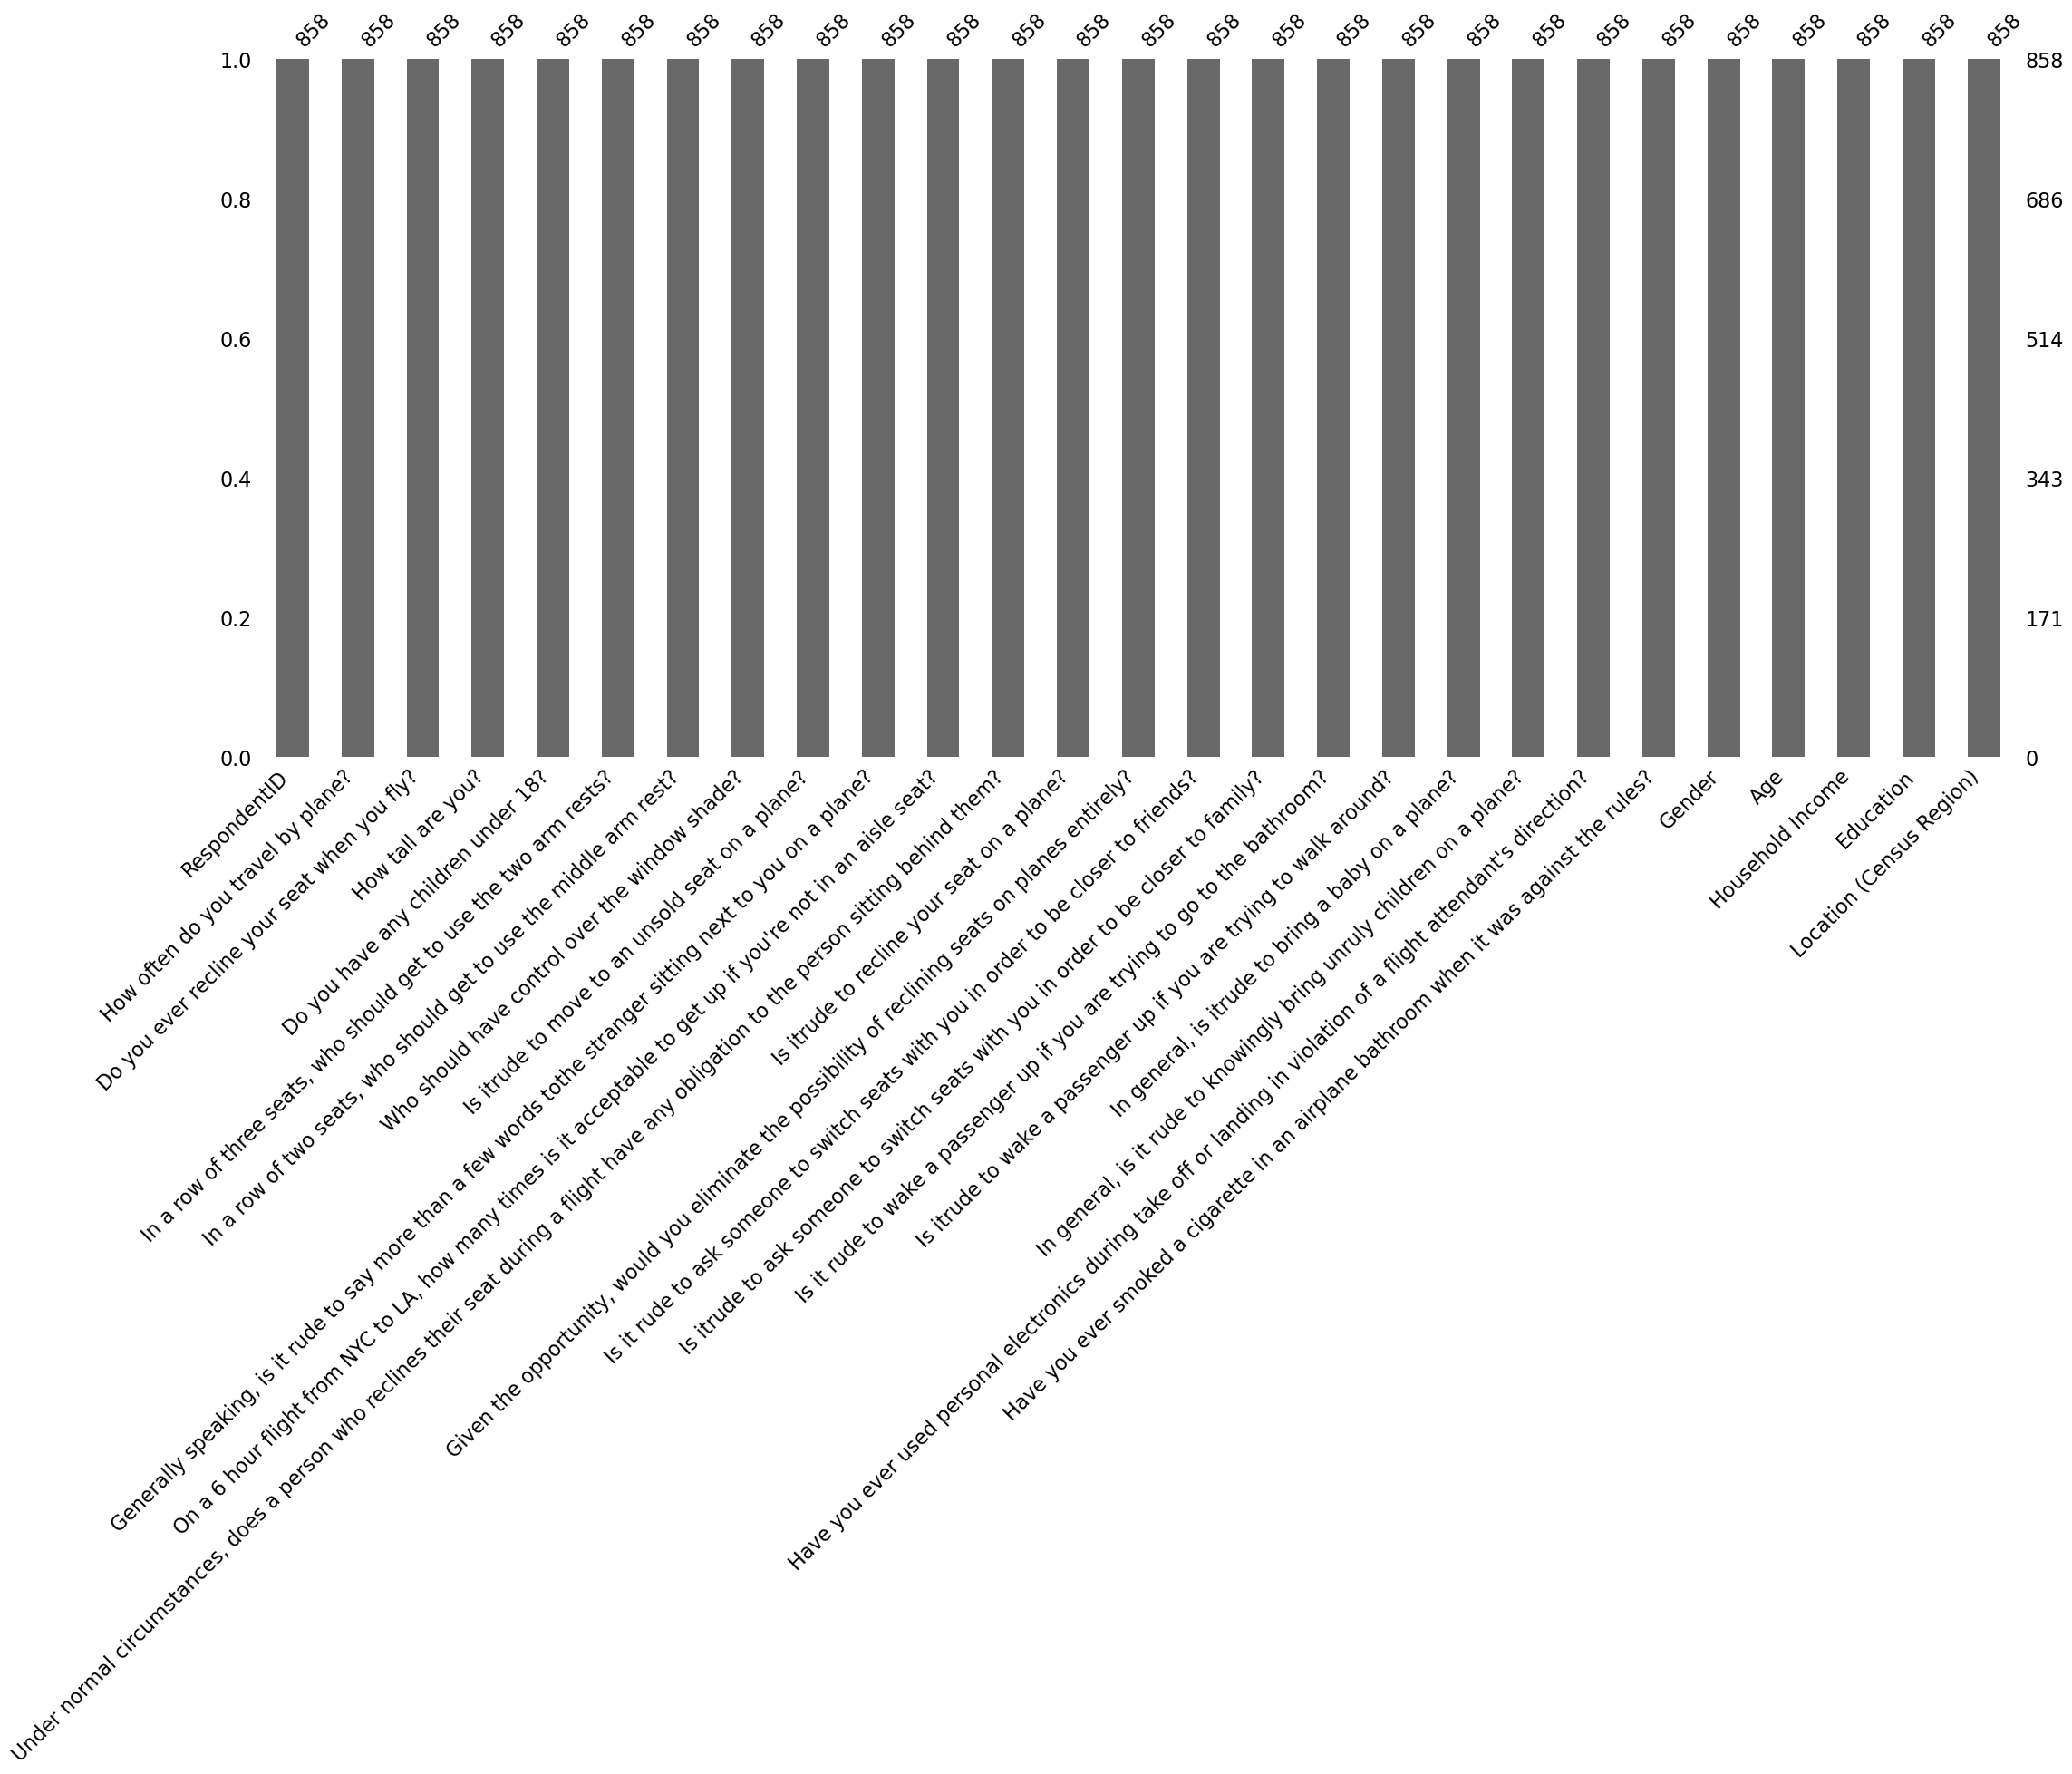

In [77]:
msno.bar(coded_df)

Now we finally get a datset with 858 sample size, no missing value.

In [78]:
coded_df.to_csv('/Users/xinqiaoyang/Desktop/coded_final.csv', index=False)